<a href="https://colab.research.google.com/github/LuvMutreja/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Unsupervised_ML_Project_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX MOVIES AND TV SHOWS CLUSTERING


##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual - Luv Mutreja


# **Project Summary -**

Clustering is the grouping of objects based on their characteristics such that there is high intra-cluster similarity and low inter-cluster similarity. It has a lot of uses in a variety of industries, including market segmentation, social network analysis, search result grouping, medical imaging, image segmentation and anomaly detection.

Data scientists and others use clustering to gain important insights from data by observing what groups (or clusters) the data points fall into when they apply a clustering algorithm to the data. Clustering can also be used for anomaly detection to find data points that are not part of any cluster, or outliers. Clustering is a part of unsupervised learning, which is a machine learning technique that does not require the supervision of models by users. In unsupervised machine learning, we use a learning algorithm to discover unknown patterns in unlabeled datasets i.e there is no target variable.

The dataset I have here is containing 7787 rows and 12 columns where each row is for a show. The columns are-
* Show id- Unique Identifier for each record.
* Type- Telling if a show is a movie or a tv show.
* Title- Telling the title of the show.
* Director- Telling the name of the director of the show.
* Cast- Actors that acted in the show.
* Country- The nation that produced that particular show.
* Date Added- Date at which the show was added on NETFLIX.
* Release Year- Year in which the show released.
* Rating- The rating of the show.
* Duration- Duration of the show in minutes for movies and in season for tv shows.
* Listed in- The genre of the show.
* Description- The description of the show.

Then I checked the null values in the dataset and found that 5 columns had null values i.e Director=2389, Cast=718, Country=507, Date added=10 and rating=7.
Which I imputed by replacing in 4 of the columns by unknown, and dropped the null values in date added column. Date added column's null values were dropped because it only had 0.09% values as null.

Then I did some manipulations-
* Created a function to extract the number of movies and tv shows an actor has appeared in.
* Created a new dataframe from the orignal dataframe which only contained the details for movies.
* Converted the duration for movies to int.
* The values for country and genre column are not ideal so only considering the first values from both the columns.
* Created a function to convert date_added column value's datatype from string to datetime datatype.
* Extracted the year from date_added column and assigned the values to a new column named year_added.
* Made a new column named latest which showed if a show was added in the same year it was released or not.
* Replaced the values of the rating column.
* Created a function to create wordcloud given dataset and column as argument.

Then I conducted 2 hypothesis tests-
* Sample mean and population mean are the same for the release year column.
in which I failed to reject the null hypothesis.
* Duration for movies is normally distributed in which I rejected the null hypothesis.

Then features were selected to conduct NLP on for further passing them into the Custering algorithms. The selected columns were [director,cast,country,listed_in,description,rating]

Then Natural Language Processing was done on the selected columns in order to apply clustering algorithm on them.TFIDF vectorizer was used to vectorize the the data because it assigns a score to each word that reflects its importance in the document and the whole corpus, which is not done by the Count Vectorizer. Then the data was scaled using Standard Scaler and then PCA was fitted over the data in order to reduce the dimensionality with the n components' value = 3.

The 1st ML model that I used was K Means clustering whose value of K was chosen by plotting the elbow chart and silhouette scores for each value of K from 1 to 25. Finally n clusters in K means was taken as 5 which was giving variance of 58185 and silhouette score of 0.458. The 2nd model that I used was Agglomerative Hierarchical Clustering in which I took n clusters as 11 by looking at the denrogram. Agglomerative Hierarchical Clustering was giving silhouette score of 
0.389. As we can make out that KMeans had better silhouette score than Agglomerative Hierarchical Clustering. Therefore it was my final chosen clustering model.

At the end, I made a recommender system that suggested me a similar show to the one that I mentioned.





# **GitHub Link -**

[GitHub Repository Link](https://github.com/LuvMutreja/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING.git)

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019.
The dataset is collected from Flixable which is a third-party Netflix search
engine. In 2018, they released an interesting report which shows that the
number of TV shows on Netflix has nearly tripled since 2010. The streaming
service's number of movies has decreased by more than 2,000 titles since 2010,
while its number of TV shows has nearly tripled. It will be interesting to explore
what all other insights can be obtained from the same dataset.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from datetime import date
from wordcloud import WordCloud, STOPWORDS
from scipy.stats import ttest_1samp
from scipy.stats import shapiro
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
plt.rcParams['figure.figsize'] = (10,6)

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Mounting the drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Alma Better/Module 4 Machine Learning/#Capstone Projects/Unsupervised Capstone Project- NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
# Dataset First Look
dataset.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
dataset.shape

(7787, 12)

### Dataset Information

In [6]:
# Dataset's Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [9]:
# printing the total null values in the dataset
print('Total null values present in this dataset are :',dataset.isnull().sum().sum())

Total null values present in this dataset are : 3631


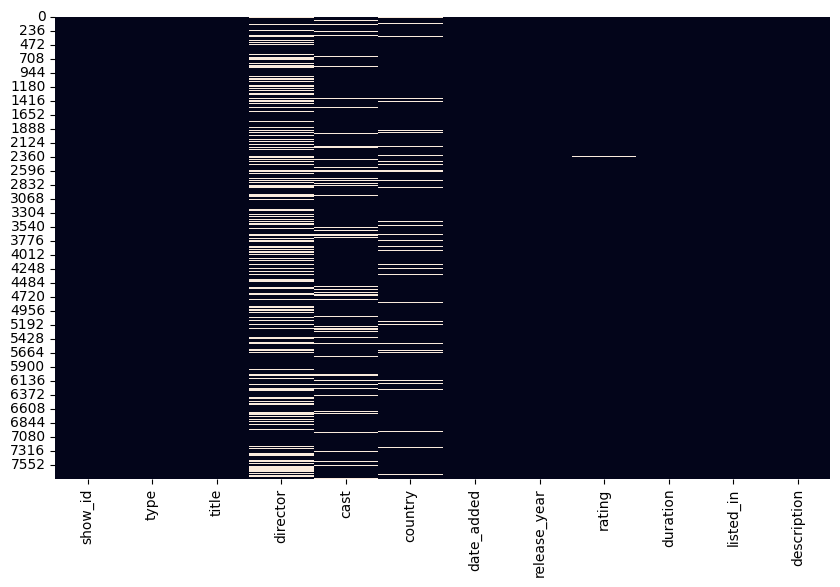

In [10]:
# visualizing Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)
plt.show()

### What did you learn about your dataset?

The dataset I have here is containing 7787 rows and 12 columns where each row is for a show. Null values in the dataset are present in 5 columns i.e Director=2389, Cast=718, Country=507, Date added=10 and rating=7.

## ***2. Understanding Your Variables***

In [11]:
# Dataset's Columns
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Describing the Dataset 
dataset.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description 

* Show id- Unique Identifier for each record.
* Type- Telling if a show is a movie or a tv show.
* Title- Telling the title of the show.
* Director- Telling the name of the director of the show.
* Cast- Actors that acted in the show.
* Country- The nation that produced that particular show.
* Date Added- Date at which the show was added on NETFLIX.
* Release Year- Year in which the show released.
* Rating- The rating of the show.
* Duration- Duration of the show in minutes for movies and in season for tv shows.
* Listed in- The genre of the show.
* Description- The description of the show.

### Check Unique Values for each variable.

In [13]:
# Number of Unique Values in each variable.
for col in dataset.columns:
  print('Number of unique values in ',col,' is ',dataset[col].nunique())

Number of unique values in  show_id  is  7787
Number of unique values in  type  is  2
Number of unique values in  title  is  7787
Number of unique values in  director  is  4049
Number of unique values in  cast  is  6831
Number of unique values in  country  is  681
Number of unique values in  date_added  is  1565
Number of unique values in  release_year  is  73
Number of unique values in  rating  is  14
Number of unique values in  duration  is  216
Number of unique values in  listed_in  is  492
Number of unique values in  description  is  7769


## 3. ***Handling Missing Values and Data Wrangling***

In [14]:
# viewing the % of null values in columns having null values
for col in dataset.columns[dataset.isnull().any()].tolist():
    print(col,'has',(dataset[col].isnull().sum()/dataset.shape[0])*100,'% null values' )

director has 30.679337357133683 % null values
cast has 9.220495697958135 % null values
country has 6.51085141903172 % null values
date_added has 0.1284191601386927 % null values
rating has 0.08989341209708489 % null values


In [15]:
# filling the null values of director, cast, country and rating columns  
for col in dataset.columns[dataset.isnull().any()].tolist():
    if col not in 'date_added':
        dataset[col].fillna('unknown',inplace=True)

**Null values for Date_added column will be handled ahead.**

In [16]:
# viewing the cast column
dataset['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                              unknown
Name: cast, Length: 7787, dtype: object

In [17]:
# making a function to extract the number of movies and tv shows an actor has appeared in
def making_df_from_column(col,column_names):
    lis=[]
    for row in range(dataset.shape[0]):
        if ',' in dataset[col][row]: 
            for item in dataset[col][row].split(','):
                lis.append(item)
        else:
            lis.append(dataset[col][row])        
    dictionary={}
    for item in set(lis):
        dictionary.update({item : lis.count(item)})
    df=pd.DataFrame(dictionary.items(),columns=column_names)
    return df 

In [18]:
# applying the above made function on the cast column
actors_df=making_df_from_column('cast',['actors','appeared_in'])
# viewing the result
actors_df

actors  appeared_in
0            Samuel West           10
1       Rosemary Shrager            2
2       Anthony R. Jones            1
3          Emraan Hashmi            3
4            Jenny Zhang            1
...                  ...          ...
35368         Ace Harney            1
35369      Jiang Mengjie            2
35370         Anita Date            1
35371           Dino Lee            1
35372         Carina Lau            1

[35373 rows x 2 columns]

In [19]:
# checking the null values for each column
dataset.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [20]:
# dropping the 10 rows with null date_added 
dataset.dropna(inplace=True)

In [21]:
# viewing the sum of null values in the dataset
dataset.isnull().sum().sum()

0

In [22]:
# making a new dataset from the orignal dataset which will contain data for movies only
movies=dataset[dataset['type']=='Movie']

In [23]:
# viewing the duration for movies
movies['duration']

1        93 min
2        78 min
3        80 min
4       123 min
6        95 min
         ...   
7781     88 min
7782     99 min
7783    111 min
7784     44 min
7786     90 min
Name: duration, Length: 5377, dtype: object

In [24]:
# converting the datatype of duration for movies to int 
movies['duration']=movies['duration'].apply(lambda x: int(x.split()[0]))

In [25]:
# viewing the country and genre column
dataset[['country','listed_in']]

country  \
0                                                Brazil   
1                                                Mexico   
2                                             Singapore   
3                                         United States   
4                                         United States   
...                                                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...   
7783                                              India   
7784                                            unknown   
7785                                          Australia   
7786              United Kingdom, Canada, United States   

                                              listed_in  
0     International TV Shows, TV Dramas, TV Sci-Fi &...  
1                          Dramas, International Movies  
2                   Horror Movies, International Movies  
3     Action & Adventure, Independent Movies, Sci-Fi...  
4                                                Dramas  
...                                                 ...  
7782                       Dramas, International Movies  
7783     Dramas, International Movies, Music & Musicals  
7784  Documentaries, International Movies, Music & M...  
7785                 International TV Shows, Reality TV  
7786                    Documentaries, Music & Musicals  

[7777 rows x 2 columns]

In [26]:
# the values for country and genre column are not ideal
# so taking the first values from both the columns
for col in ['country','listed_in']:
  dataset[col]=dataset[col].apply(lambda x : x.split(',')[0])

In [27]:
# now as we can see the country and genre column will contain only the first values
dataset

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0               unknown  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784            unknown                                            Nasty C   
7785            unknown                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            unknown   

             country          date_added  release_year rating   duration  \
0             Brazil     August 14, 2020          2020  TV-MA  4 Seasons   
1             Mexico   December 23, 2016          2016  TV-MA     93 min   
2          Singapore   December 20, 2018          2011      R     78 min   
3      United States   November 16, 2017          2009  PG-13     80 min   
4      United States     January 1, 2020          2008  PG-13    123 min   
...              ...                 ...           ...    ...        ...   
7782          Sweden    October 19, 2020          2005  TV-MA     99 min   
7783           India       March 2, 2019          2015  TV-14    111 min   
7784         unknown  September 25, 2020          2019  TV-MA     44 min   
7785       Australia    October 31, 2020          2019  TV-PG   1 Season   
7786  United Kingdom       March 1, 2020          2019  TV-MA     90 min   

                   listed_in  \
0     International TV Shows   
1                     Dramas   
2              Horror Movies   
3         Action & Adventure   
4                     Dramas   
...                      ...   
7782                  Dramas   
7783                  Dramas   
7784           Documentaries   
7785  International TV Shows   
7786           Documentaries   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devastating earthquake hits Mexico Cit...  
2     When an army recruit is found dead, his fellow...  
3     In a postapocalyptic world, rag-doll robots hi...  
4     A brilliant group of students become card-coun...  
...                                                 ...  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...  

[7777 rows x 12 columns]

In [28]:
# Creating a function to convert date_added value's datatype from string to a string that can be converted to datetime datatype
def date_to_str(s):
  s=s.split()
  if s[1][0]==' ':
    s1='0'+s[1][1]+'.'
  else:
    s1=s[1][:-1]+'.'  
  if 'Jan'in s[0][:3]:
    s1=s1+'01'
  elif 'Feb'in s[0][:3]:
    s1=s1+'02'
  elif 'Mar'in s[0][:3]:
    s1=s1+'03'
  elif 'Apr'in s[0][:3]:
    s1=s1+'04'
  elif 'May'in s[0][:3]:
    s1=s1+'05'
  elif 'Jun'in s[0][:3]:
    s1=s1+'06'
  elif 'Jul'in s[0][:3]:
    s1=s1+'07'
  elif 'Aug'in s[0][:3]:
    s1=s1+'08'
  elif 'Sep'in s[0][:3]:
    s1=s1+'09'
  elif 'Oct'in s[0][:3]:
    s1=s1+'10'
  elif 'Nov'in s[0][:3]:
    s1=s1+'11'
  elif 'Dec'in s[0][:3]:
    s1=s1+'12'    
  s1=s1+'.'
  s1=s1+s[2][-2:]
  return s1                   

In [29]:
# applying the above created function to the date_added column
dataset['date_added']=dataset.apply(lambda x:date_to_str(x['date_added']),axis=1)

In [30]:
# converting the date_added column's datatype to datetime datatype
dataset['date_added']=dataset['date_added'].apply(lambda x:datetime.strptime(x,'%d.%m.%y'))

In [31]:
# viewing the dataset
dataset

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0               unknown  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784            unknown                                            Nasty C   
7785            unknown                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            unknown   

             country date_added  release_year rating   duration  \
0             Brazil 2020-08-14          2020  TV-MA  4 Seasons   
1             Mexico 2016-12-23          2016  TV-MA     93 min   
2          Singapore 2018-12-20          2011      R     78 min   
3      United States 2017-11-16          2009  PG-13     80 min   
4      United States 2020-01-01          2008  PG-13    123 min   
...              ...        ...           ...    ...        ...   
7782          Sweden 2020-10-19          2005  TV-MA     99 min   
7783           India 2019-03-02          2015  TV-14    111 min   
7784         unknown 2020-09-25          2019  TV-MA     44 min   
7785       Australia 2020-10-31          2019  TV-PG   1 Season   
7786  United Kingdom 2020-03-01          2019  TV-MA     90 min   

                   listed_in  \
0     International TV Shows   
1                     Dramas   
2              Horror Movies   
3         Action & Adventure   
4                     Dramas   
...                      ...   
7782                  Dramas   
7783                  Dramas   
7784           Documentaries   
7785  International TV Shows   
7786           Documentaries   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devastating earthquake hits Mexico Cit...  
2     When an army recruit is found dead, his fellow...  
3     In a postapocalyptic world, rag-doll robots hi...  
4     A brilliant group of students become card-coun...  
...                                                 ...  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...  

[7777 rows x 12 columns]

In [32]:
# extracting the year from date_added column
dataset['year_added']=dataset['date_added'].apply(lambda x : x.year)

In [33]:
# viewing the dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   object        
 9   duration      7777 non-null   object        
 10  listed_in     7777 non-null   object        
 11  description   7777 non-null   object        
 12  year_added    7777 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 850.6+ KB


In [34]:
# making a new column which will tell if a show was added in the same year it was released or not
dataset['latest']=np.where(dataset['year_added']==dataset['release_year'],1,0)

In [35]:
# creating a dictionary for the values of the rating column
rating_dict={'rating':{'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}}
# replacing the rating column's values 
dataset=dataset.replace(rating_dict)

In [36]:
# viewing the 1st 5 rows
dataset.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year  rating   duration               listed_in  \
0 2020-08-14          2020  Adults  4 Seasons  International TV Shows   
1 2016-12-23          2016  Adults     93 min                  Dramas   
2 2018-12-20          2011  Adults     78 min           Horror Movies   
3 2017-11-16          2009   Teens     80 min      Action & Adventure   
4 2020-01-01          2008   Teens    123 min                  Dramas   

                                         description  year_added  latest  
0  In a future where the elite inhabit an island ...        2020       1  
1  After a devastating earthquake hits Mexico Cit...        2016       1  
2  When an army recruit is found dead, his fellow...        2018       0  
3  In a postapocalyptic world, rag-doll robots hi...        2017       0  
4  A brilliant group of students become card-coun...        2020       0

In [37]:
# defining a function to create a bag of words given dataset and column as argument
def wordcloud(dataset,column):
  words=''
  stopwords= set(STOPWORDS)
  for value in dataset[column].values:
    value=str(value)
    tokens=value.split()
    for i in range(len(tokens)):
      tokens[i]=tokens[i].lower()
    words= words + ' '.join(tokens)+' '  
  wordcloud= WordCloud(width=700,height=700,background_color='white',stopwords=stopwords,min_font_size=10).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  return plt.show()

#### What all missing value imputation techniques have you used and why did you use those techniques?

There were 5 columns haveing null values
* Director column had 31% of the values as null so I replaced those values with unknown.
* Cast column had 9% of the values as null so I replaced those values with unknown.
* Country had 6.5% of the values as null so I replaced those values with unknown.
* Rating had 0.09% of the values as null so I replaced those values with unknown.
* Date_added had 0.13% of the values as null so I dropped those values.

### What all manipulations have you done and insights you found?

The manipulations done insights found are:
* Created a function to extract the number of movies and tv shows an actor has appeared in.
* Created a new dataframe from the orignal dataframe which only contained the details for movies.
* Converted the duration for movies to int.
* The values for country and genre column are not ideal so only considering the first values from both the columns.
* Created a function to convert date_added column value's datatype from string to datetime datatype.
* Extracted the year from date_added column and assigned the values to a new column named year_added.
* Made a new column named latest which showed if a show was added in the same year it was released or not.
* Replaced the values of the rating column.
* Created a function to create wordcloud given dataset and column as argument.

## ***5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1. Show Type value counts (univariate)

In [38]:
# visualization code
px.pie(names=np.sort(dataset['type'].unique()),values=dataset['type'].value_counts(),template='plotly_dark',hole=0.8,width=450,height=400,color_discrete_sequence=['#FFFF00', '#Ff0000']).update_traces(hovertemplate=None,textinfo='percent + value + label',showlegend=False).update_layout(title_text='Number of TV Shows and Movies',title_x=0.5)

##### 1. Why did you pick the specific chart?

To view the number of Movies and TV Shows.

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* Movies are more in number i.e 69% i.e 5377.
* TV Shows are less in number i.e 31% i.e 2400.

#### Chart - 2. Number of shows released in each year (univariate)

In [39]:
# visualization code
px.histogram(dataset,x='release_year',color_discrete_sequence=['#Ff0000'],template='plotly_dark').update_layout(title_text='Shows released year wise',title_x=0.5)

##### 1. Why did you pick the specific chart?

To view in which year were maximum shows released 

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* Maximum shows released in the year 2018 i.e 1120. 

#### Chart - 3. Actors who appeared in most shows (univariate)

In [40]:
# visualization code
px.bar(actors_df.sort_values(by='appeared_in',ascending=False)[1:20],x='actors',y='appeared_in',template='plotly_dark',color_discrete_sequence=['#800020']).update_layout(title_text='Top 20 Actors who appeared in most shows',title_x=0.5)

##### 1. Why did you pick the specific chart?

To view Actors who appeared in most shows

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* Anupam Kher appeared in most of the shows i.e 38.
* Followed by Takahiro Sakurai i.e 28.
*  Followed by Shah Rukh Khan i.e 27.

#### Chart - 4. Countries producing the maximum content (univariate)

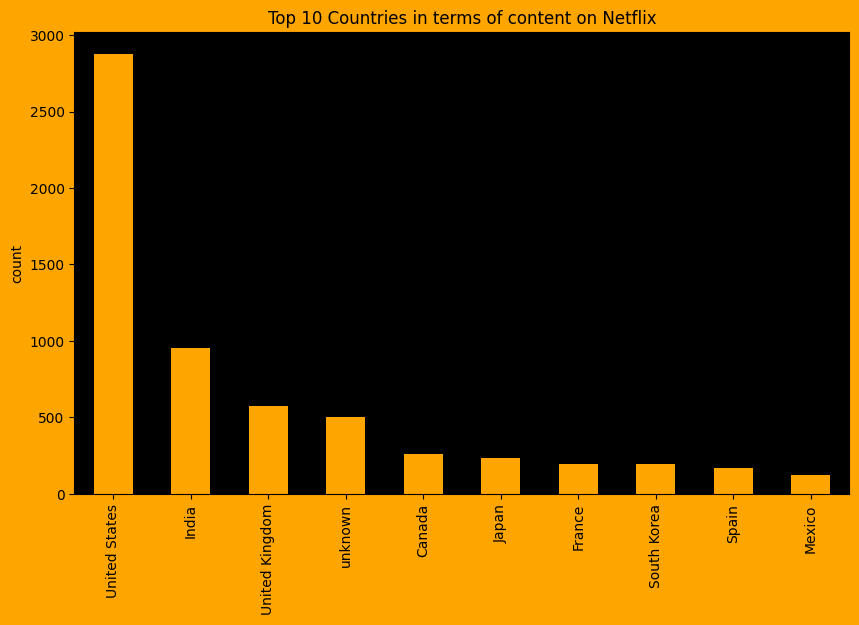

In [41]:
# Chart - 7 visualization code
plt.figure(facecolor='#FFA500')
plt.axes().set_facecolor("black")
dataset['country'].value_counts()[:10].plot(kind='bar',color='#FFA500')
plt.title('Top 10 Countries in terms of content on Netflix')
plt.ylabel('count')
plt.show()

##### 1. Why did you pick the specific chart?

To view the Countries producing the maximum content

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* United States is producing the maximum content.
* Followed by India.
* Followed by United Kingdom.

#### Chart - 5. Top 10 Directors (univariate)

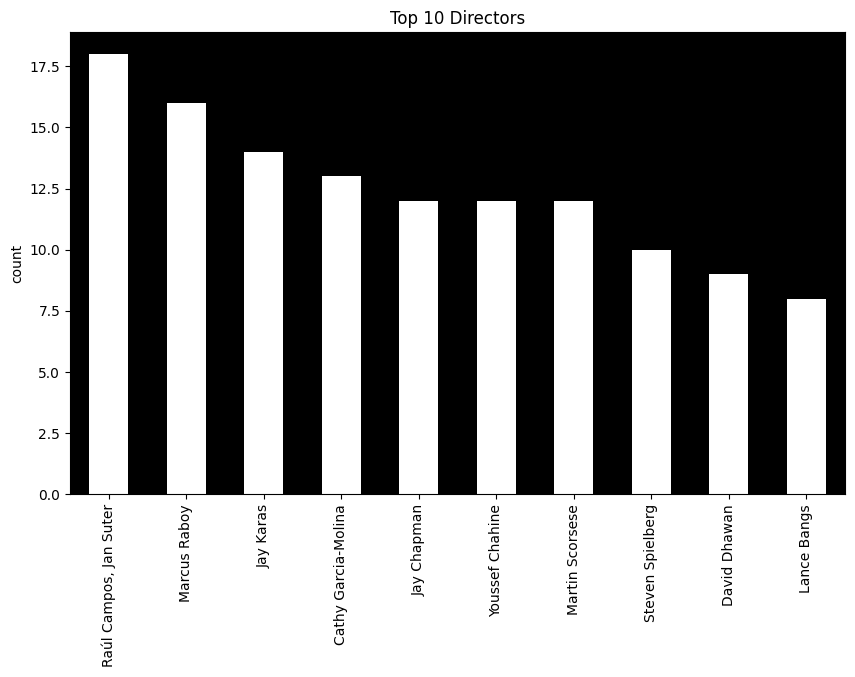

In [42]:
# visualization code
plt.figure(facecolor='white')
plt.axes().set_facecolor("black")
dataset['director'].value_counts()[1:11].plot(kind='bar',color='white')
plt.title('Top 10 Directors')
plt.ylabel('count')
plt.show()

##### 1. Why did you pick the specific chart?

To view the top directors in terms of content on netflix

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* Raul and Jan have directed the maximum content.
* Followed by Marcus.
* Followed by Jay Karas.

#### Chart - 6. Which Genre has the highest number of shows (univariate)

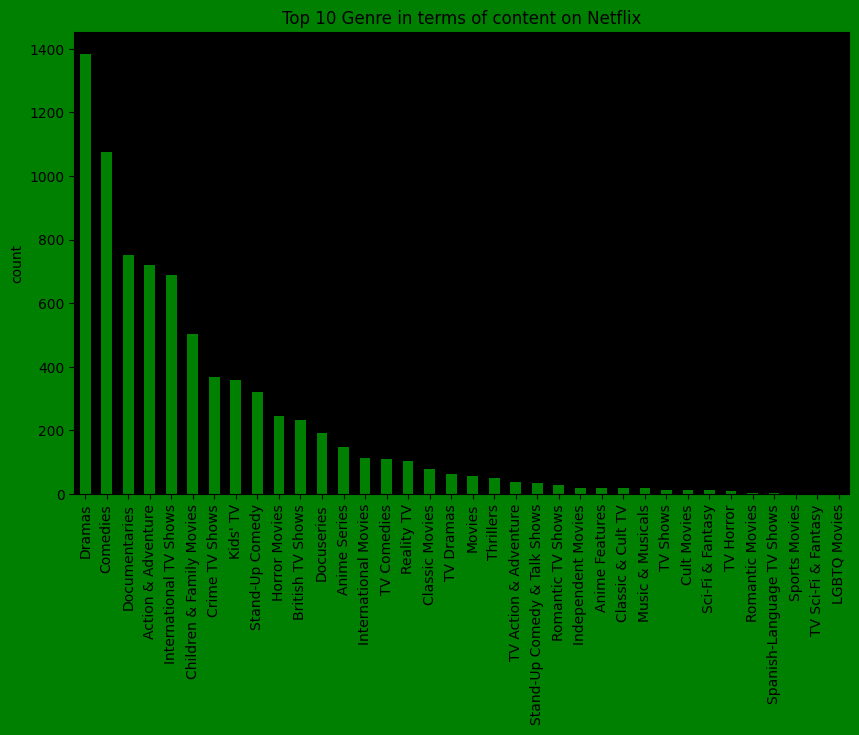

In [43]:
# Chart - 9 visualization code
plt.figure(facecolor='green')
plt.axes().set_facecolor("black")
dataset['listed_in'].value_counts().plot(kind='bar',color='green')
plt.title('Top 10 Genre in terms of content on Netflix')
plt.ylabel('count')
plt.show()

##### 1. Why did you pick the specific chart?

To view the genre having the maximum content

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* Maximum content belongs to drama genre.
* Followed by comedy genre.
* Followed by documentaries.

#### Chart - 7. Movies duration (univariate)

In [44]:
# visualization code
px.histogram(movies,x='duration',template='plotly_dark',color_discrete_sequence=['#00FF00']).update_traces(showlegend=False).update_layout(title_text='Number of Movies for each Movie duration',title_x=0.5)

##### 1. Why did you pick the specific chart?

To view Number of Movies for each Movie duration

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* Maximum i.e 261 movies fall in the 90-91 min duration. 
* 249 movies fall in the 92-93 min duration.
* 244 movies fall in the 94-95 min duration

#### Chart - 8. TV Shows Duration (univariate)

In [45]:
# visualization code
px.histogram(dataset[dataset['type']=='TV Show'],x='duration',color='type',template='plotly_dark',color_discrete_sequence=['#008080']).update_traces(showlegend=False).update_layout(title_text='Number of TV Shows for each TV Show duration',title_x=0.5)

##### 1. Why did you pick the specific chart?

To view Number of tv shows for each tv shows duration

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* Maximum i.e 1608 tv shows have 1 season.
* 378 tv shows have 2 seasons.
* 183 tv shows have 3 seasons.

#### Chart - 9. ICICLE chart for Country (univariate)

In [46]:
# visualization code
px.icicle(dataset,path=[px.Constant('world'),'country'],template='plotly_dark')

##### 1. Why did you pick the specific chart?

To view the descending order of country in terms of content on netflix

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* Zimbabwe, Mauritius are at the last with 1 show each.
* India is 2nd with 956 shows.
* United States is 1st with 2877 shows.

#### Chart - 10. Word CLoud for Description column (univariate) 

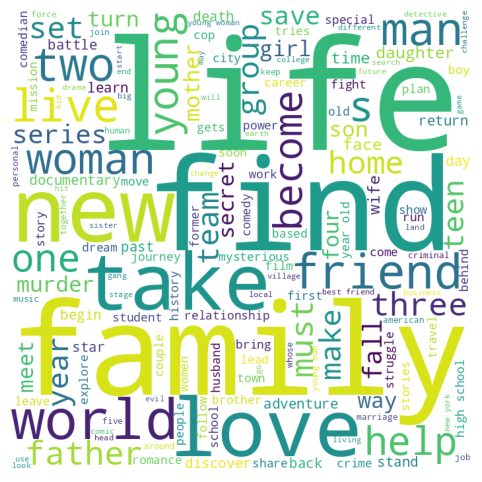

In [47]:
# visualization code
wordcloud(dataset,'description')

##### 1. Why did you pick the specific chart?

To view the wordcloud for description column

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* The main words from the description column are:
 
 - New, love, life family, find, world, take etc.

#### Chart - 11. Latest Shows (univariate)

In [48]:
# visualization code
px.pie(names=dataset['latest'].unique(),values=np.sort(dataset['latest'].value_counts()),hole=0.5,template='plotly_dark',width=650,height=350,color_discrete_sequence=['#7A2048','#1E2761']).update_traces(hovertemplate=None,textinfo='percent + value + label',showlegend=False).update_layout(title_text='Release year and Added year same for shows (1 means Yes 0 means No)',title_x=0.5)

##### 1. Why did you pick the specific chart?

To view the number of latest shows.

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* 2825 shows were added in the same year in which they released.
* 4952 shows were  not added in the same year in which they released.

#### Chart - 12. Number of tv shows and movies released in each year (bivariate)

In [49]:
# visualization code
px.histogram(dataset,x='release_year',color='type',color_discrete_sequence=['#Ff0000','#0000ff'],barmode='group',template='plotly_dark').update_layout(title_text='TV shows and Movies released year wise',title_x=0.5)

##### 1. Why did you pick the specific chart?

To view the Number of tv shows and movies released in each year

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* In 2017 the highest number of movies were released i.e 744.
* In 2020 the highest number of tv shows were released i.e 457.
* On only 2 occasions the number of tv shows were more than movie releases i.e in the years 2020 and 2021, that may be because of covid.  

#### Chart - 13. When were most of the Shows added on NETFLIX (bivariate)

In [50]:
# visualization code
px.histogram(dataset,x='year_added',color='type',barmode='group',template='plotly_dark',color_discrete_sequence=['#FFFF00','#013220']).update_layout(title_text='In which year were most shows added',title_x=0.5)

##### 1. Why did you pick the specific chart?

TO view when were most of the Shows added on NETFLIX

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* Highest movies were added in the year 2019 i.e 1497.
* Highest tv shows were added in the year 2020 i.e 697.

#### Chart - 14. For which Age group does Netflix has the most content (bivariate)

In [51]:
# visualization code
px.histogram(dataset,x='rating',color='type',barmode='group',template='plotly_dark',color_discrete_sequence=['#FF69B4','#7F00FF']).update_layout(title_text='Number of shows for different age groups',title_x=0.5)

##### 1. Why did you pick the specific chart?

To view the Number of Movies and Tv Shows for different show Ratings

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* Movies and tv shows are in descending order for adults > teens > older kids > kids.

## ***6. Hypothesis Testing***

### Based on your chart experiments, define two hypothetical statements from the dataset. In the next two questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Sample mean and population mean are the same for the release year column.
---
2. Duration for movies is normally distributed.

### Hypothetical Statement - 1. Sample mean and population mean are the same for the release year column.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis=> Ho = Sample mean and population mean are the same for the release year column.  
* Alternate hypothesis=> Ha = Sample mean and population mean are not the same for the release year column.

#### 2. Perform an appropriate statistical test.

In [52]:
# specifying the population for the hypothesis test
population= dataset['release_year'].values
# specifying the sample size i.e 10% and taking sample of specified size from the population 
sample_size=int(round(dataset.shape[0]*0.1,0))
population_sample= np.random.choice(population,sample_size)
# conducting the hypothesis test and printing the result of the test
ttest,p_value1 = ttest_1samp(population_sample,population.mean())
print(round(p_value1,10))
if p_value1>0.05:
  print('We fail to reject null hypothesis')
else:
  print('We reject null hypothesis')

0.2422941134
We fail to reject null hypothesis


##### Which statistical test have you done to obtain P-Value?

I used one sample T Test to obtain the p value

##### Why did you choose the specific statistical test?

Because i wanted to check if popualtion and sample mean are same or not and T test fulfils this purpose.  

### Hypothetical Statement - 2. Duration for movies is normally distributed.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis=> Ho = Duration for movies is normally distributed.  
* Alternate hypothesis=> Ha = Duration for movies is not normally distributed.

#### 2. Perform an appropriate statistical test.

In [53]:
# checking if duration for movies follows a normal distribution through a hypothesis test 
data_to_test = movies['duration']
stat,p_value = shapiro(data_to_test)
print(round(p_value,3))
if p_value>0.05:
  print('We fail to reject null hypothesis as the feature is Normally Distributed')
else:
  print('We reject null hypothesis as the feature is not Normally Distributed')  

0.0
We reject null hypothesis as the feature is not Normally Distributed


##### Which statistical test have you done to obtain P-Value?

Used shapiro (a built in function of scipy library) to obtain the P value. 

##### Why did you choose the specific statistical test?

I used shapiro because it is used to check if a particular column(duration for movies in this case) is normally disrtributed or not. 

## ***7. Feature Engineering & Data Pre-processing***

### 1. Feature Manipulation & Selection

In [54]:
# viewing the 1st 5 rows
dataset.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year  rating   duration               listed_in  \
0 2020-08-14          2020  Adults  4 Seasons  International TV Shows   
1 2016-12-23          2016  Adults     93 min                  Dramas   
2 2018-12-20          2011  Adults     78 min           Horror Movies   
3 2017-11-16          2009   Teens     80 min      Action & Adventure   
4 2020-01-01          2008   Teens    123 min                  Dramas   

                                         description  year_added  latest  
0  In a future where the elite inhabit an island ...        2020       1  
1  After a devastating earthquake hits Mexico Cit...        2016       1  
2  When an army recruit is found dead, his fellow...        2018       0  
3  In a postapocalyptic world, rag-doll robots hi...        2017       0  
4  A brilliant group of students become card-coun...        2020       0

In [55]:
# choosing the columns that will be used for clustering and making a new detaframe with those columns
clustering_df=dataset[['title','director','cast','country','listed_in','description','rating']]

In [56]:
# setting the title as the index of the new dataframe
clustering_df.set_index('title',inplace=True)

In [57]:
# viewing 1st 5 rows of the new dataframe
clustering_df.head()

director                                               cast  \
title                                                                         
3%               unknown  João Miguel, Bianca Comparato, Michel Gomes, R...   
7:19   Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
23:59       Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
9            Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
21        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   

             country               listed_in  \
title                                          
3%            Brazil  International TV Shows   
7:19          Mexico                  Dramas   
23:59      Singapore           Horror Movies   
9      United States      Action & Adventure   
21     United States                  Dramas   

                                             description  rating  
title                                                             
3%     In a future where the elite inhabit an island ...  Adults  
7:19   After a devastating earthquake hits Mexico Cit...  Adults  
23:59  When an army recruit is found dead, his fellow...  Adults  
9      In a postapocalyptic world, rag-doll robots hi...   Teens  
21     A brilliant group of students become card-coun...   Teens

In [58]:
# making a single column by combining all the necessary columns 
clustering_df['clustering_column']=clustering_df['listed_in']+' '+clustering_df['country']+' '+clustering_df['rating']+' '+clustering_df['director']+' '+clustering_df['cast']+' '+clustering_df['description']

In [59]:
# only keeping the column which has all the content and dropping the remaining columns
clustering_df.drop([col for col in clustering_df.columns if col not in 'clustering_column'],axis=1,inplace=True)

In [60]:
# viewing the dataframe
clustering_df

clustering_column
title                                                                                     
3%                                       International TV Shows Brazil Adults unknown J...
7:19                                     Dramas Mexico Adults Jorge Michel Grau Demián ...
23:59                                    Horror Movies Singapore Adults Gilbert Chan Te...
9                                        Action & Adventure United States Teens Shane A...
21                                       Dramas United States Teens Robert Luketic Jim ...
...                                                                                    ...
Zozo                                     Dramas Sweden Adults Josef Fares Imad Creidi, ...
Zubaan                                   Dramas India Teens Mozez Singh Vicky Kaushal, ...
Zulu Man in Japan                        Documentaries unknown Adults unknown Nasty C I...
Zumbo's Just Desserts                    International TV Shows Australia Older Kids un...
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS  Documentaries United Kingdom Adults Sam Dunn u...

[7777 rows x 1 columns]

In [61]:
# viewing the 1st row of the clustering column
clustering_df['clustering_column'][0]

'International TV Shows Brazil Adults unknown João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

##### Which all features you found important and why?

The columns that I found important are [title,director,cast,country,listed_in,description,rating] because these columns are the necessary text columns that will be further passed to the clustering algorithms.

### 2. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Lower Casing

In [62]:
# converting the clustering column's values to lower case
clustering_df['clustering_column']=clustering_df['clustering_column'].str.lower()

In [63]:
# viewing the 1st row of the clustering column
clustering_df['clustering_column'][0]

'international tv shows brazil adults unknown joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

#### 2. Expand Contraction

In [64]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 15.4 MB/s eta 0:00:00


In [65]:
# importing contractions
import contractions
# defining a function to expand the words and remove the expansions
def expansion_function(string):
  expanded=[]
  for word in string.split():
    expanded.append(contractions.fix(word))
  expanded=' '.join(expanded)
  return expanded

In [66]:
# applying the expansion fuction
clustering_df['clustering_column']=clustering_df['clustering_column'].apply(expansion_function)

In [67]:
# viewing the 1st row of the clustering column
clustering_df['clustering_column'][0]

'international tv shows brazil adults unknown joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

#### 3. Removing Punctuations

In [68]:
# defining a function to remove punctuations
def remove_punctuations(string):
  final=''
  for char in string:
    if char not in [',','.',"'",'"','?','!',';','%','(',')','&','-','1','2','3','4','5','6','7','8','9','0','_']:
      final+=char
  return final    

In [69]:
# applying the above function
clustering_df['clustering_column']=clustering_df['clustering_column'].apply(remove_punctuations)

In [70]:
# viewing the 1st row of the clustering column
clustering_df['clustering_column'][0]

'international tv shows brazil adults unknown joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor'

#### 5. Removing Stopwords

In [71]:
# defining a function to remove the stopwords
def remove_stopwords(string):
  final=[]
  stopwords=set(STOPWORDS)
  for word in string.split():
    if word not in stopwords:
      final.append(word)
  final= ' '.join(final)
  return final    

In [72]:
# applying the above function
clustering_df['clustering_column']=clustering_df['clustering_column'].apply(remove_stopwords)

In [73]:
# viewing the 1st row of the clustering column
clustering_df['clustering_column'][0]

'international tv shows brazil adults unknown joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi future elite inhabit island paradise far crowded slums one chance join saved squalor'

#### 8. Lemmatization

In [74]:
# importing the libraries important for lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [75]:
# defining a function to lemmatize the words
def lemmatization(string):
  lemmatizer=WordNetLemmatizer()
  lemmatized=[lemmatizer.lemmatize(word) for word in string.split()]
  lemmatized= ' '.join(lemmatized)
  return lemmatized

In [76]:
# applying the above fuction
clustering_df['clustering_column']=clustering_df['clustering_column'].apply(lemmatization)

In [77]:
# viewing the 1st row of the clustering column
print(clustering_df['clustering_column'][0])

international tv show brazil adult unknown joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi future elite inhabit island paradise far crowded slum one chance join saved squalor


In [78]:
# creating a same dataframe which will be used further
clustering_df1=clustering_df.copy()

##### Which text normalization technique have you used and why?

The text normalization technique that I have used is lemmatization, I haven't used stemming because in stemming the words that are returned are not from the english dictionary, and because I will further be plotting the wordcloud for the clustering column for each cluster after implementing clustering algorithms, and I want that wordcloud to be understandable. Therefore, I am using Lemmatization.   

#### 10. Text Vectorization

In [79]:
# Initializing a TfidfVectorizer object
tfidf = TfidfVectorizer(max_df=0.9,min_df=3,max_features=7000)
# Fitting the vectorizer to the corpus and transform it into a TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(clustering_df['clustering_column'])
# viewing the shape of the tfidf matrix
tfidf_matrix.shape

(7777, 7000)

In [80]:
# converting the tfidf matrix to a dataframe
tfidf_df=pd.DataFrame(tfidf_matrix.toarray())
# and viewing it
tfidf_df

0         1     2     3     4     5     6     7     8     9     ...  \
0      0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1      0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2      0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3      0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4      0.0  0.151452   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...    ...       ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
7772   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7773   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7774   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7775   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7776   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

      6990  6991  6992  6993  6994  6995  6996  6997  6998  6999  
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
7772   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7773   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7774   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7775   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7776   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[7777 rows x 7000 columns]

##### Which text vectorization technique have you used and why?

I have used TFIDF vectorizer because it assigns a score to each word that reflects its importance in the document and the whole corpus, which is not done by the Count Vectorizer.

### 3. Data Scaling

In [81]:
# scaling the data using standard scaler
stdsc=StandardScaler()
x=stdsc.fit_transform(tfidf_df)

##### Which method have you used to scale you data and why?

I have used standard scaler to scale the data because standard scaler is robust to outliers and standard scaler does not limit the data within a specified range, so the data does leave its pattern and trends.Lastly, whenever PCA has to be applied then data is first scaled using standard scaler most of the time.

### 4. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, Diamensionality reduction is needed here beacause the number of columns we have are 14871. We can not work with these many rows and inorder to apply any machine learning algorithm on the data we must reduce its dimensions i.e features i.e columns.  

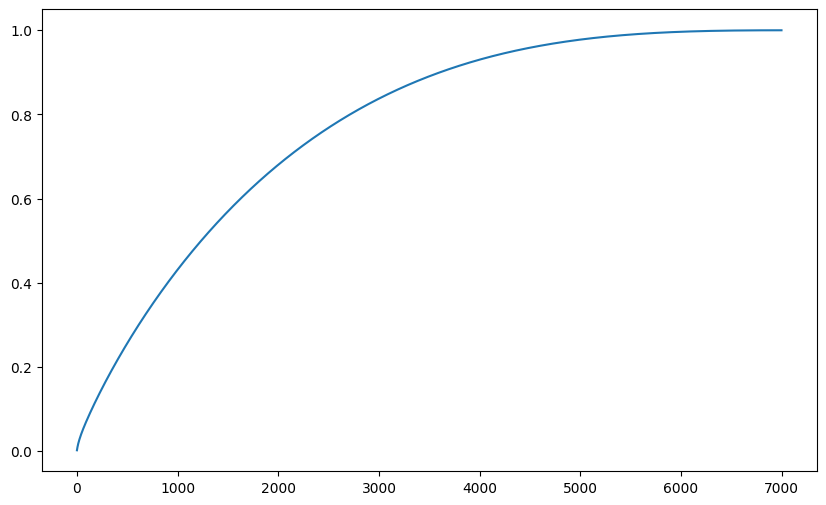

In [82]:
# initializing the pca object
pca=PCA()
# fitting the pca object
pca.fit(x)
# plotting the explained variance ratio's cummulative sum
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [83]:
# using pca with  n_components 
pca=PCA(n_components=3,random_state=2510)
pca.fit(x)

PCA(n_components=3, random_state=2510)

In [84]:
# transforming the data by applying pca on it
x_pca=pca.transform(x)

In [85]:
# viewing the shape
x_pca.shape

(7777, 3)

In [86]:
# viewing the cummulative sum of variance explained by the chosen number of pcs
np.cumsum(pca.explained_variance_ratio_)

array([0.00221702, 0.00405483, 0.00549432])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used Principle Component Analysis on the data to reduce the dimensions of the dataset so that clustering algorithms can be applied on the data.

## ***8. ML Model Implementation***

### ML Model - 1. KMeans

#### Deciding the optimal value of K in KMeans

In [87]:
# creating the dataframe whose columns will be k : the number of clusters and each cluster's variance and silhouette score
cluster_range=range(1,25)
variance=[]
sil_scores=[]
for k in cluster_range:
  kmeans=KMeans(k,random_state=2510)
  kmeans.fit(x_pca)
  variance.append(kmeans.inertia_)
  if k==1:
    sil_scores.append(0)
  else:  
    sil_scores.append(silhouette_score(x_pca,kmeans.labels_))

kmeans_df=pd.DataFrame({'k':cluster_range,'variance':variance,'silhouette_score':sil_scores})  

In [88]:
# viewing the created dataframe
kmeans_df

k       variance  silhouette_score
0    1  299116.208072          0.000000
1    2  197793.835794          0.778105
2    3  119275.648806          0.613040
3    4   78844.661284          0.469892
4    5   58185.444278          0.457950
5    6   48601.004682          0.461455
6    7   41260.572395          0.407500
7    8   35070.796020          0.410162
8    9   29330.958106          0.420137
9   10   25569.364544          0.425581
10  11   22485.918683          0.407102
11  12   20218.702665          0.403135
12  13   18248.504890          0.410499
13  14   16734.324094          0.368620
14  15   15352.670792          0.366390
15  16   14166.837811          0.354174
16  17   13186.539595          0.362860
17  18   12241.990215          0.379247
18  19   11249.817043          0.363584
19  20   10585.954979          0.359984
20  21   10045.571157          0.342359
21  22    9537.919011          0.343432
22  23    9101.135864          0.338923
23  24    8681.242647          0.336282

**Using the elbow method**

In [89]:
# plotting the variance for each value of k in kmeans
px.line(kmeans_df,x='k',y='variance',template='plotly_dark').update_layout(title_text='Elbow plot for each value of K',title_x=0.5)

Through the elbow curve we can see that there is a bend at 5.

**And the Silhouette score method**

In [90]:
# plotting the silhoutte score for each value of k in kmeans
px.line(kmeans_df.iloc[1:],x='k',y='silhouette_score',template='plotly_dark').update_layout(title_text='Silhouette score plot for each value of K',title_x=0.5)

The silhouette score is highest for when k is equal to 2.

#### Choosing K as 5

In [91]:
# choosing k as 5
kmeans=KMeans(n_clusters=5,algorithm='elkan',random_state=2510)
# fitting the kmeans algorithm on x pca
kmeans.fit(x_pca)

KMeans(algorithm='elkan', n_clusters=5, random_state=2510)

In [92]:
# printing the variance and silhoutte score for the selected value of k
print(kmeans.inertia_,silhouette_score(x_pca,kmeans.labels_))
# printing the number of itertions it took for convergence
kmeans.n_iter_ 

58185.444278373456 0.4579503799700642


6

In [93]:
# storing the values of cluster labels
labels=kmeans.predict(x_pca)
# plotting the clusters
px.scatter_3d(x_pca,x=x_pca[:, 0],y=x_pca[:, 1],z=x_pca[:, 2], color=labels,template='plotly_dark')

**Wordcloud for each KMeans Cluster**

Wordcloud for cluster: 0


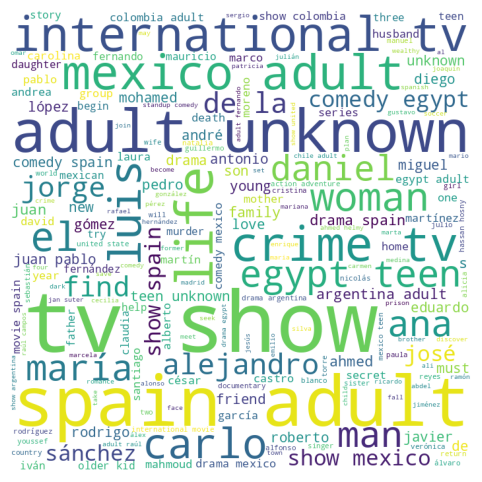

***************************************************************
Wordcloud for cluster: 1


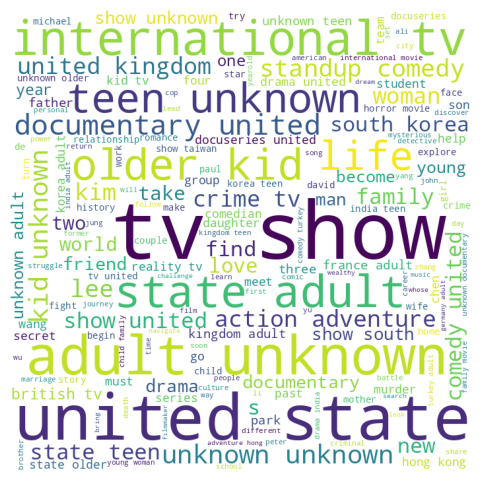

***************************************************************
Wordcloud for cluster: 2


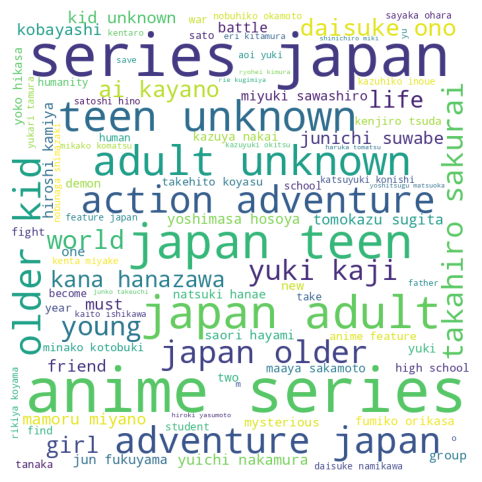

***************************************************************
Wordcloud for cluster: 3


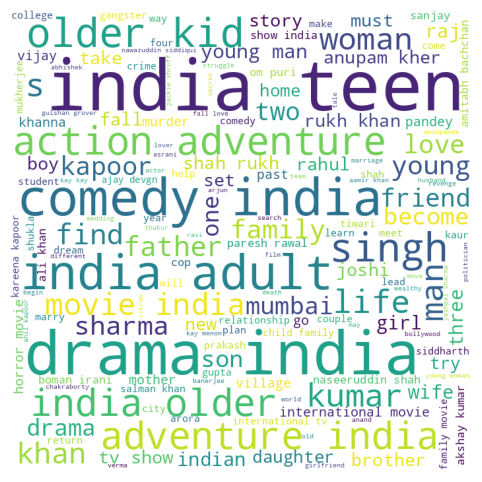

***************************************************************
Wordcloud for cluster: 4


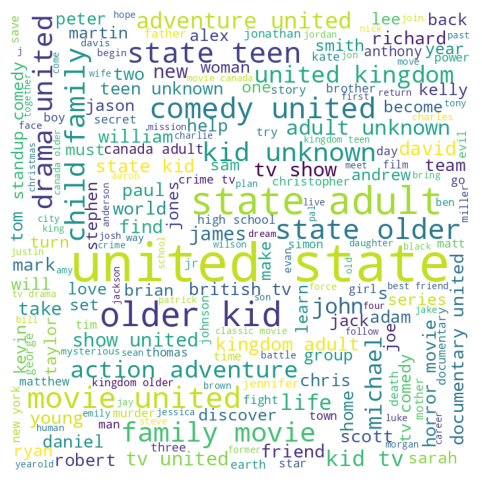

***************************************************************


In [94]:
# printing wordclouds for each cluster
clustering_df1['kmeans_cluster']=kmeans.labels_
for cn in range(kmeans.n_clusters):
  print('Wordcloud for cluster:',cn)
  wordcloud(clustering_df1[clustering_df1['kmeans_cluster']==cn],'clustering_column')
  print('*'*63)

In [95]:
# storing the cluster labels in new column
dataset['kmeans_cluster']=kmeans.labels_
# viewing the clusters' value counts
px.pie(values=dataset['kmeans_cluster'].value_counts().values,names=dataset['kmeans_cluster'].value_counts().index,template='plotly_dark',width=600,height=500,color_discrete_sequence=['orange', 'white','green','cyan','darkblue']).update_traces(hovertemplate=None,textinfo='percent + value + label',showlegend=False).update_layout(title_text='Value Counts for each cluster',title_x=0.5)

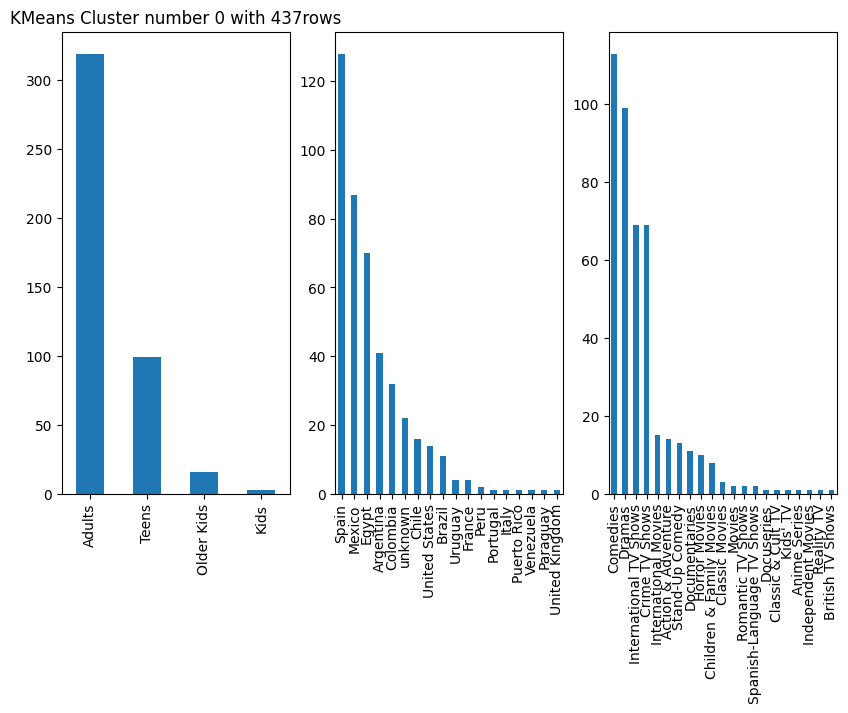

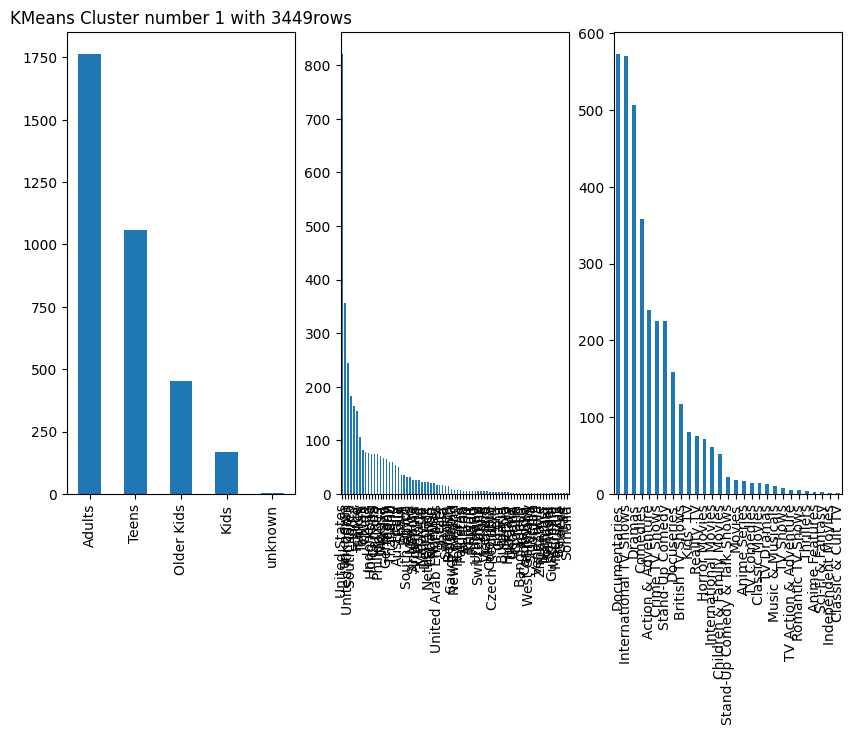

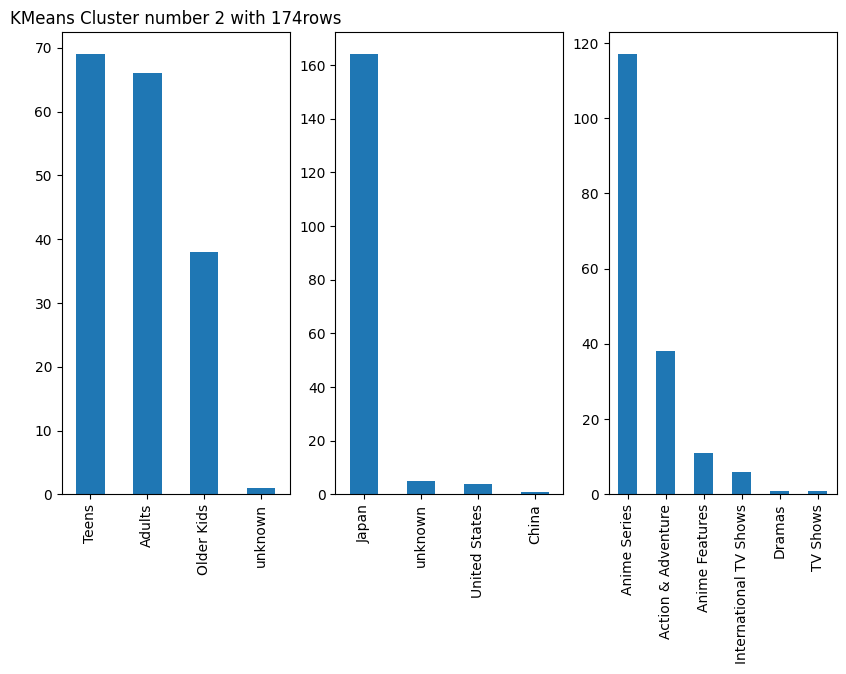

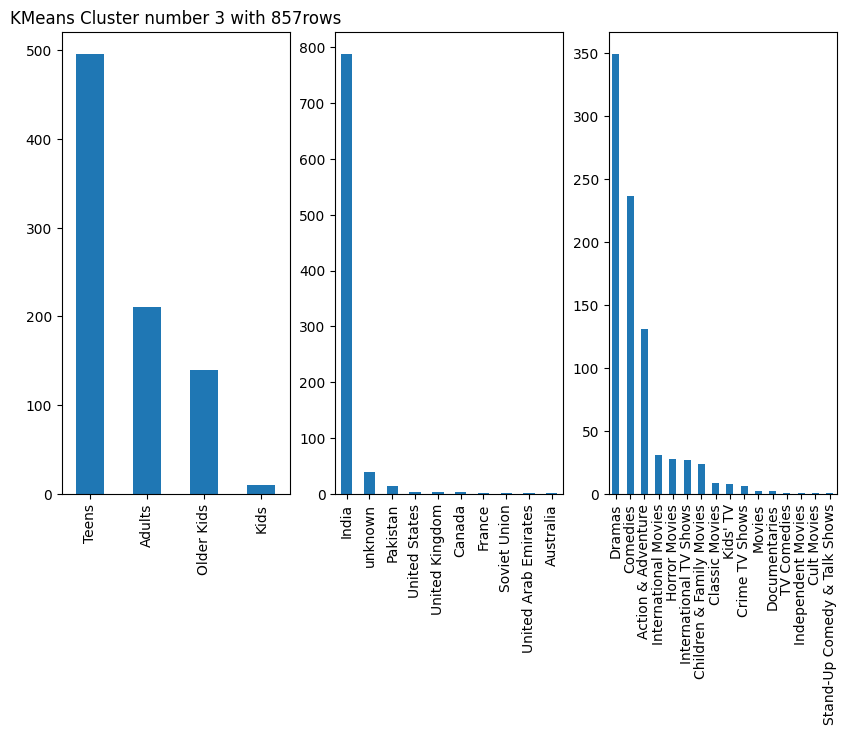

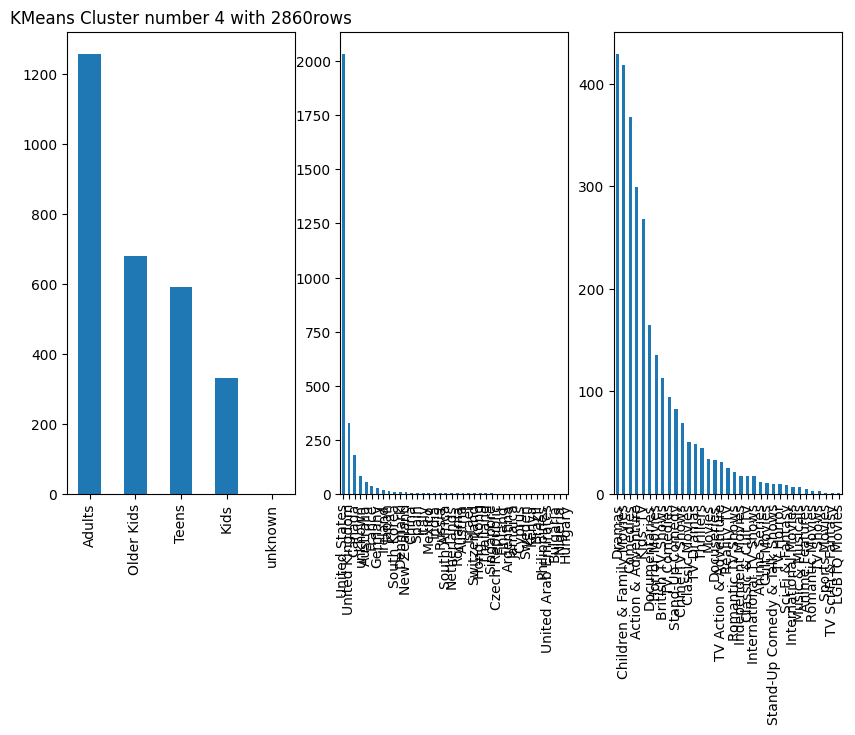

In [96]:
# viewing the rating, genre and country for each cluster
for cn in range(kmeans.n_clusters):
  cluster_label='KMeans Cluster number'+' '+str(cn)+' '+'with'+' '+str(len(dataset[dataset['kmeans_cluster']==cn]))+'rows'  
  plt.subplot(1,3,1)
  dataset[dataset['kmeans_cluster']==cn]['rating'].value_counts().plot(kind='bar')
  plt.title(cluster_label)
  plt.subplot(1,3,2)
  dataset[dataset['kmeans_cluster']==cn]['country'].value_counts().plot(kind='bar')
  plt.subplot(1,3,3)
  dataset[dataset['kmeans_cluster']==cn]['listed_in'].value_counts().plot(kind='bar')
  plt.show()

### ML Model - 2. Hierarchical Clustering

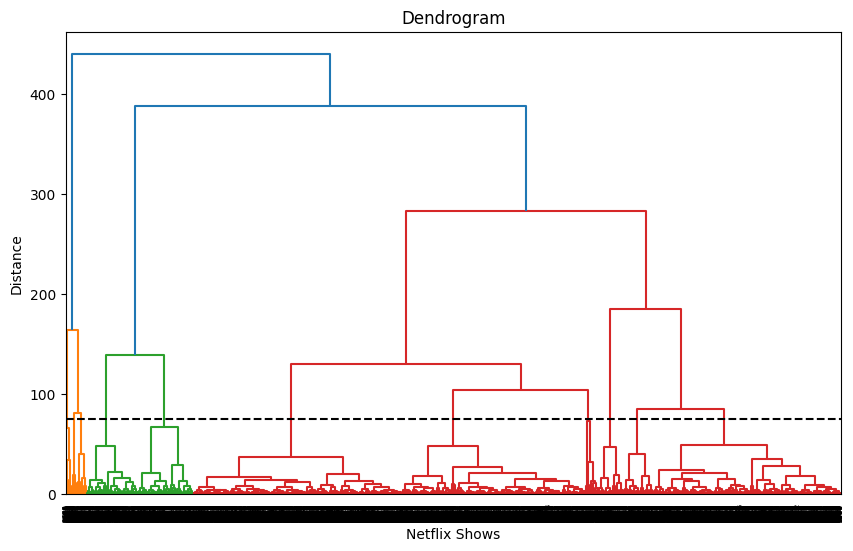

In [97]:
# plotting the dendrogram
dendrogram = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 75, color='black', linestyle='--')
plt.show()

#### **Agglomerative Hierarchical Clustering**

In [98]:
# choosing the number of clusters as 11
hc=AgglomerativeClustering(n_clusters=11,affinity='euclidean',linkage='ward')
# fitting the agglomerative clustering algorithm on x_pca
hc_labels=hc.fit_predict(x_pca)
# printing the silhouette score
print(silhouette_score(x_pca,hc.labels_))

0.3885740414097274


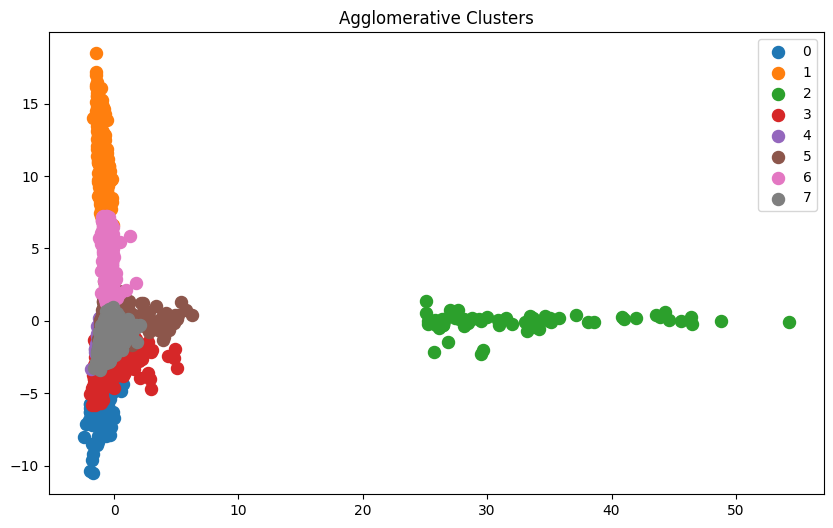

In [99]:
# plotting the agglomerative clusters
for i in range(8):
  plt.scatter(x_pca[hc_labels==i,0],x_pca[hc_labels==i,1],s=75,label=str(i))
plt.title('Agglomerative Clusters')
plt.legend()  
plt.show()  

**Wordcloud for each Hierarchical cluster**

Wordcloud for cluster: 0


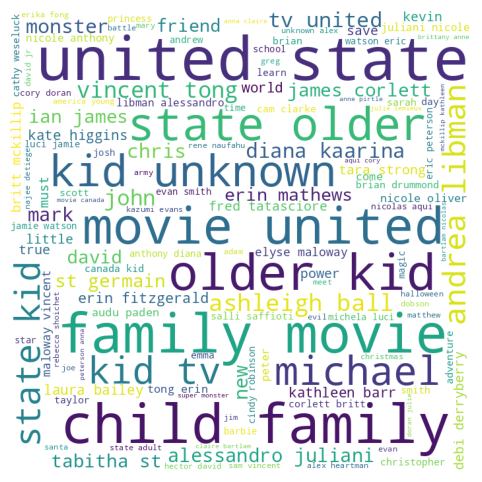

***************************************************************
Wordcloud for cluster: 1


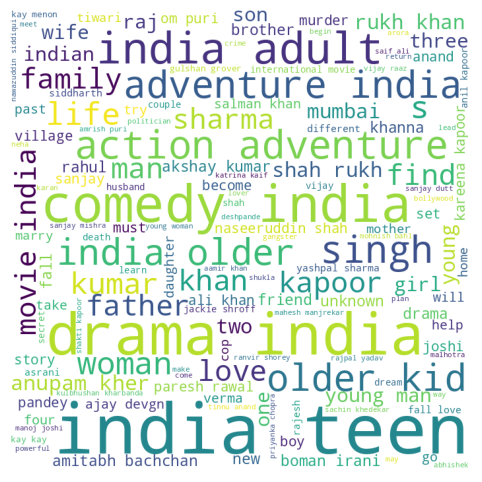

***************************************************************
Wordcloud for cluster: 2


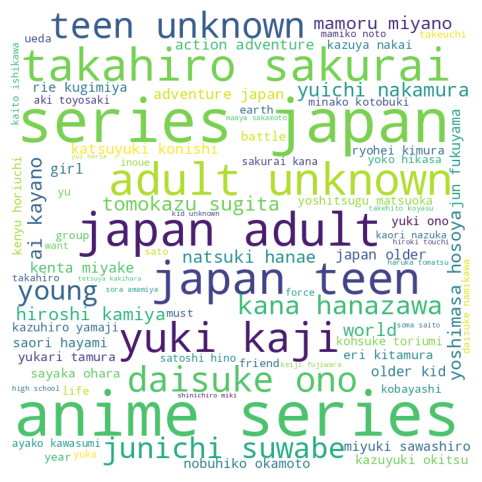

***************************************************************
Wordcloud for cluster: 3


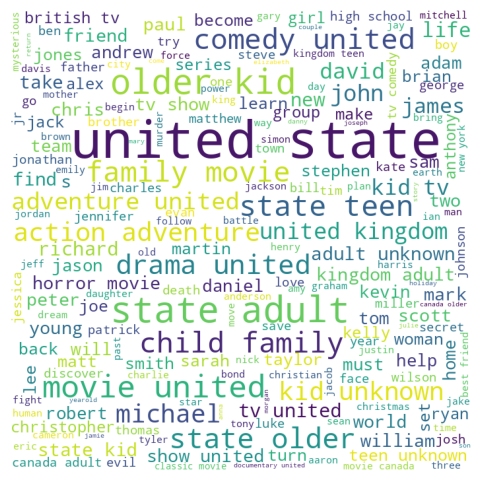

***************************************************************
Wordcloud for cluster: 4


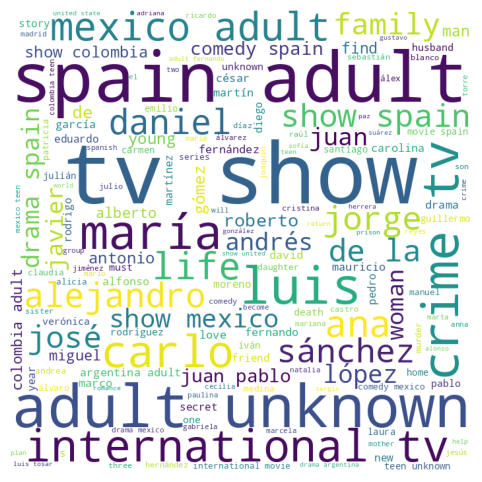

***************************************************************
Wordcloud for cluster: 5


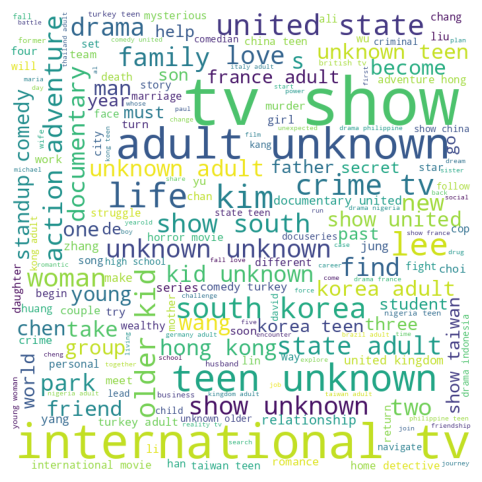

***************************************************************
Wordcloud for cluster: 6


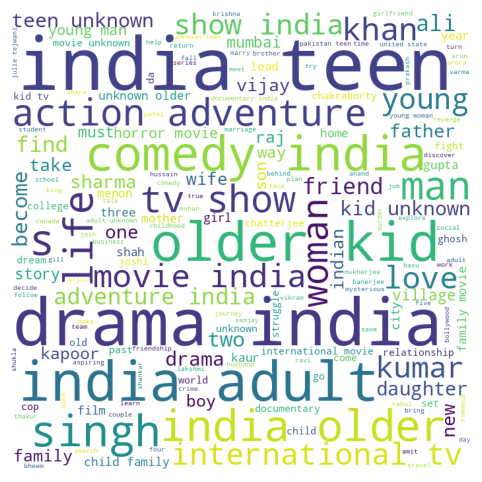

***************************************************************
Wordcloud for cluster: 7


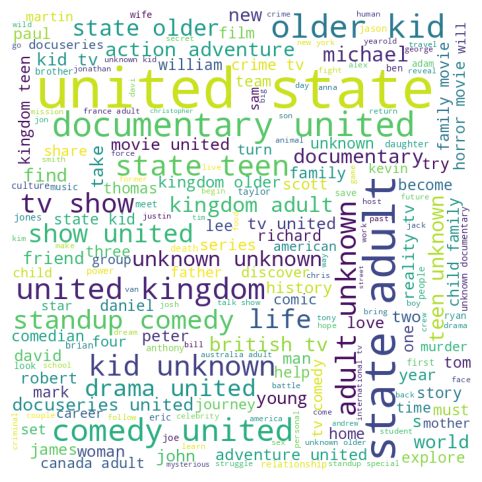

***************************************************************
Wordcloud for cluster: 8


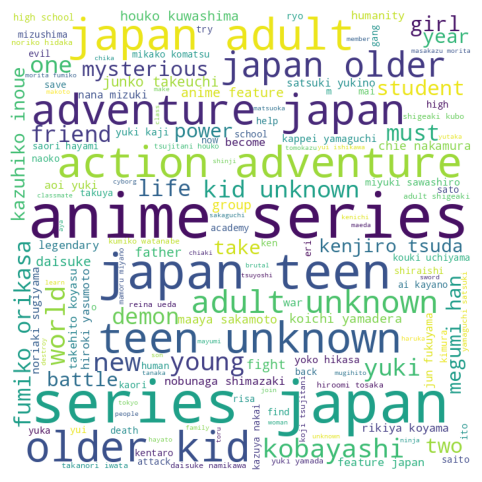

***************************************************************
Wordcloud for cluster: 9


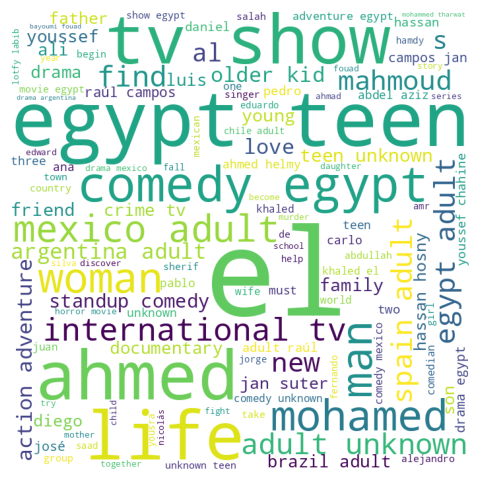

***************************************************************
Wordcloud for cluster: 10


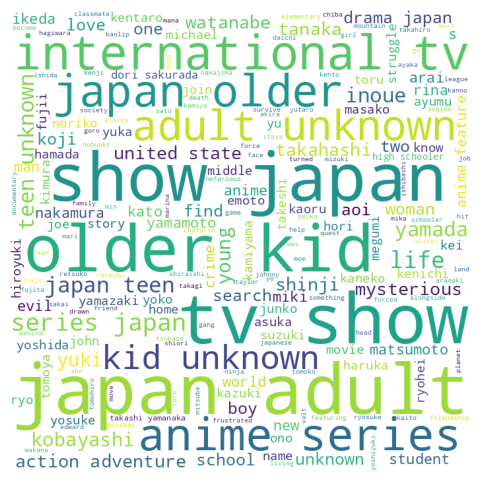

***************************************************************


In [100]:
# printing wordclouds for each cluster
clustering_df1['hierarchical_cluster']=hc.labels_
for cn in range(hc.n_clusters):
  print('Wordcloud for cluster:',cn)
  wordcloud(clustering_df1[clustering_df1['hierarchical_cluster']==cn],'clustering_column')
  print('*'*63)

In [101]:
# storing the cluster labels in new column
dataset['hierarchical_cluster']=hc.labels_
# viewing the clusters' value counts
px.pie(values=dataset['hierarchical_cluster'].value_counts().values,names=dataset['hierarchical_cluster'].value_counts().index,template='plotly_dark',height=800,color_discrete_sequence=['cyan', 'teal','blue','red','pink','yellow','darkgreen','darkblue','maroon','purple','orange']).update_traces(hovertemplate=None,textinfo='percent + value + label',showlegend=False).update_layout(title_text='Value Counts for each cluster',title_x=0.5)

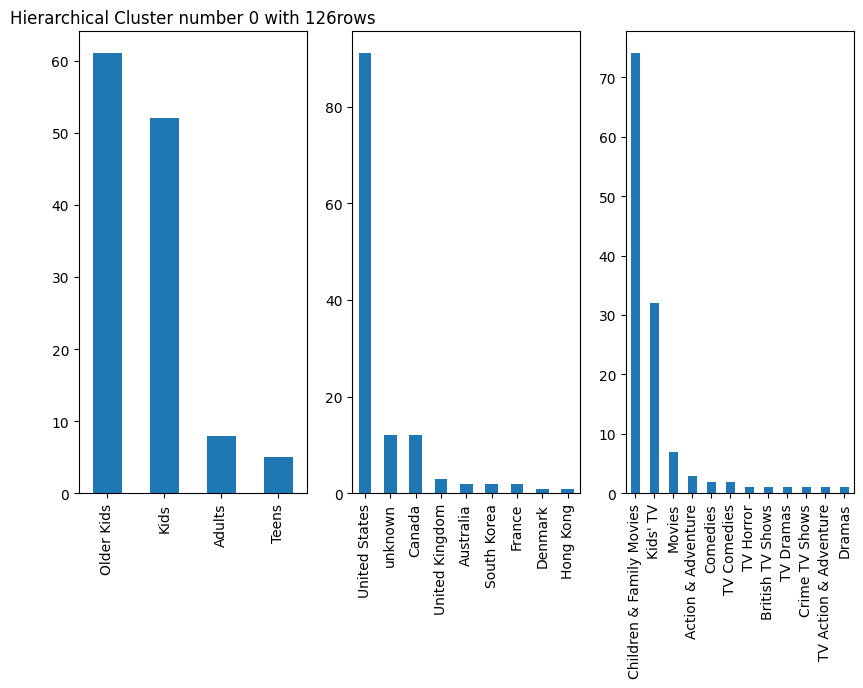

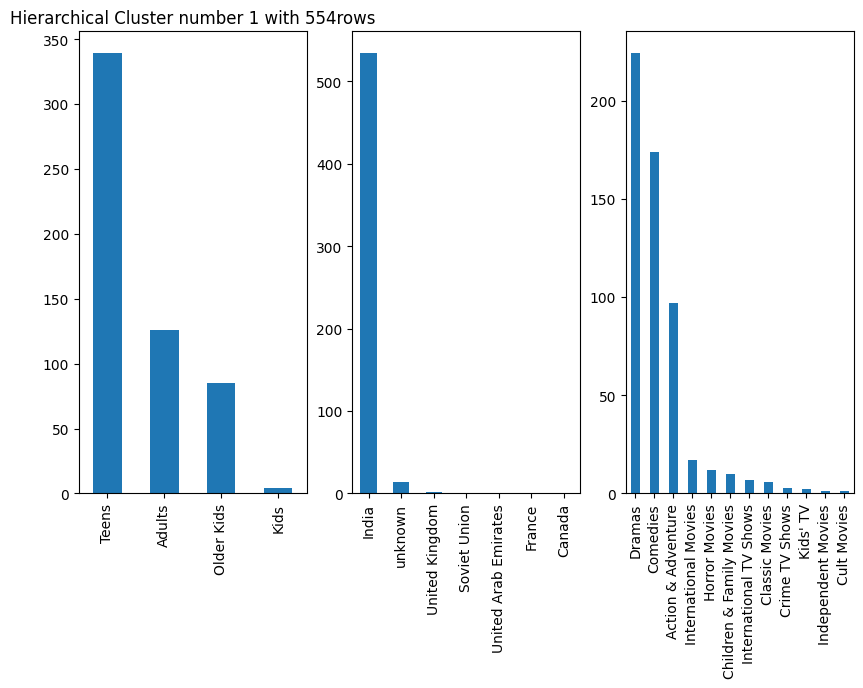

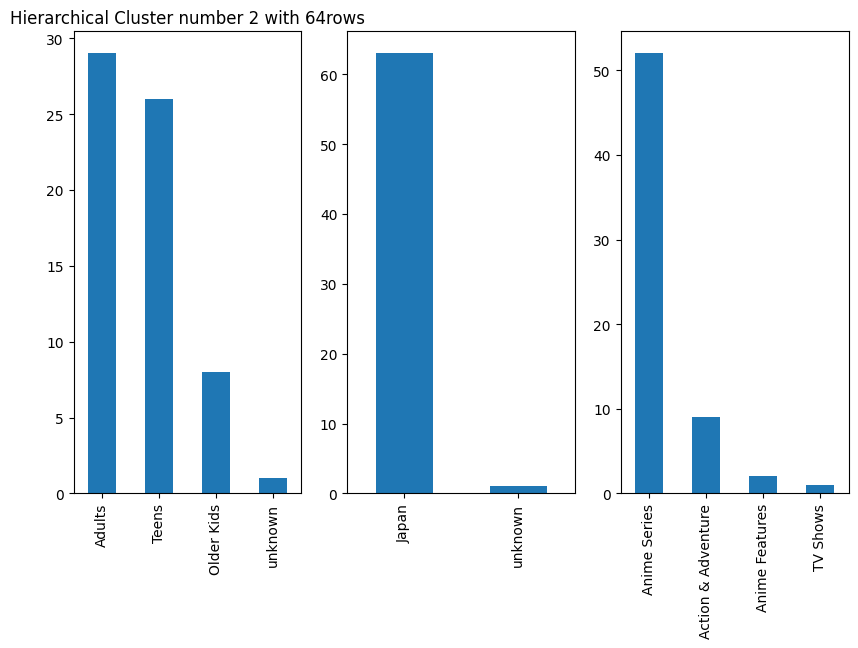

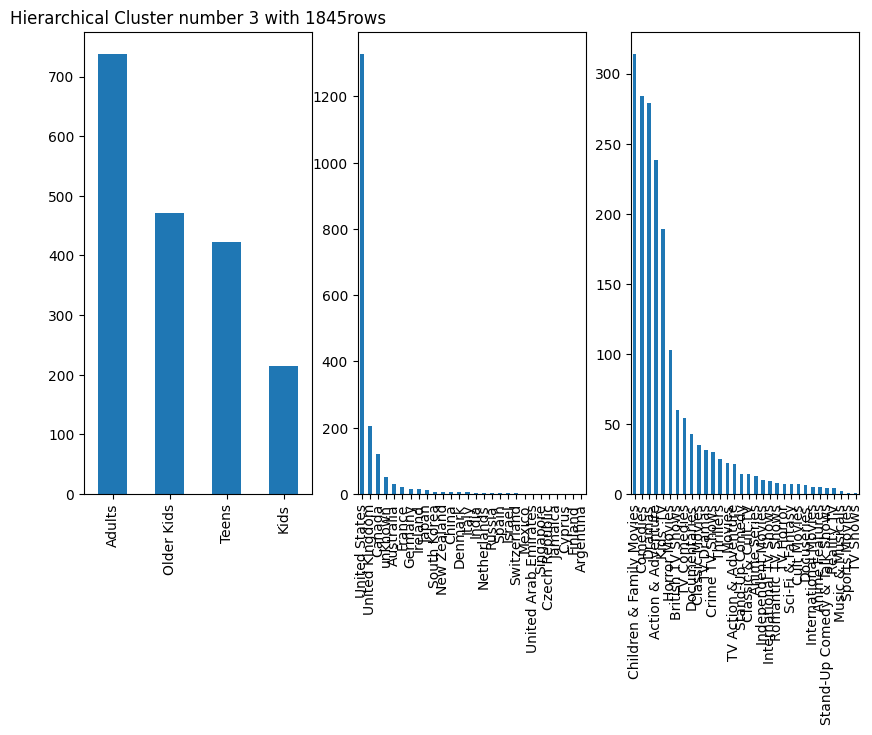

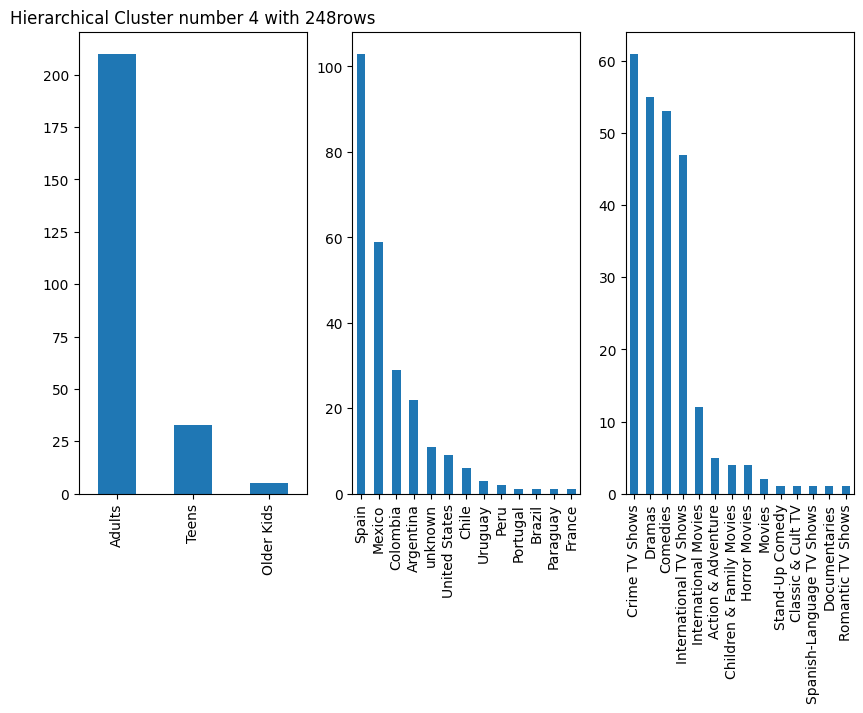

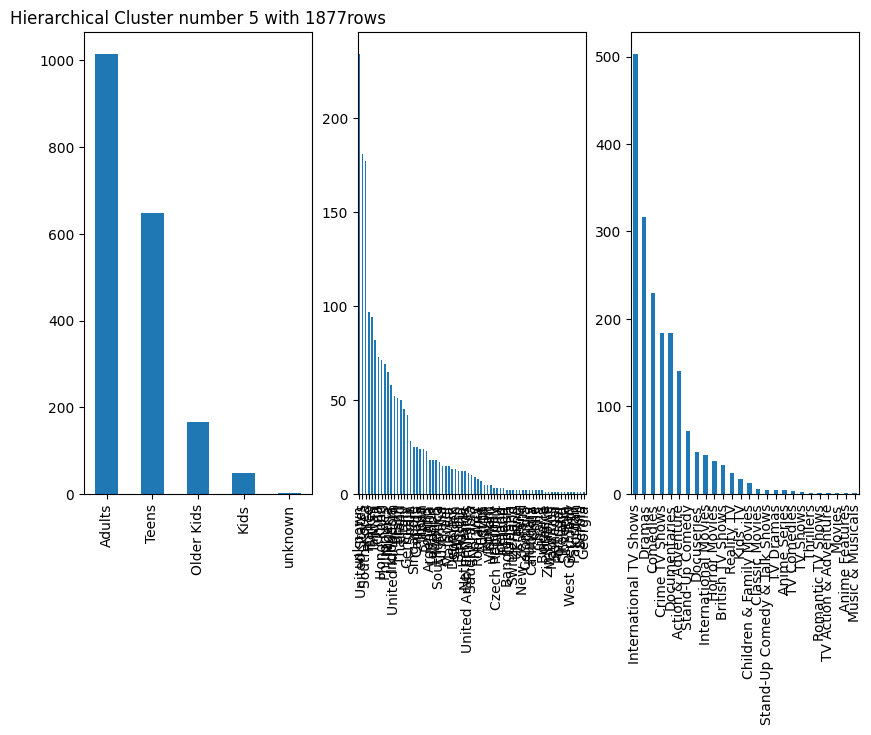

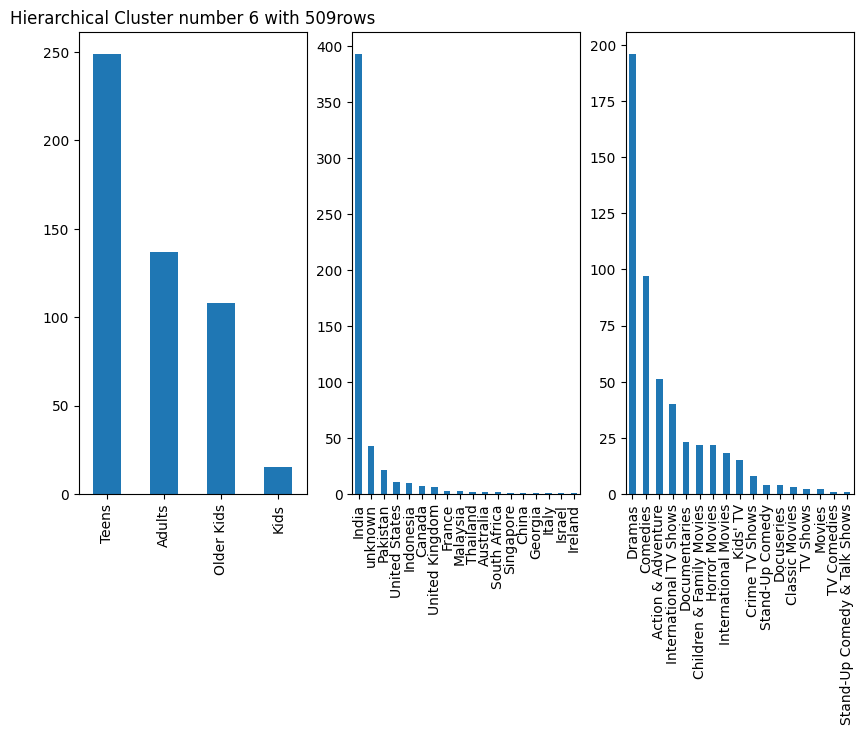

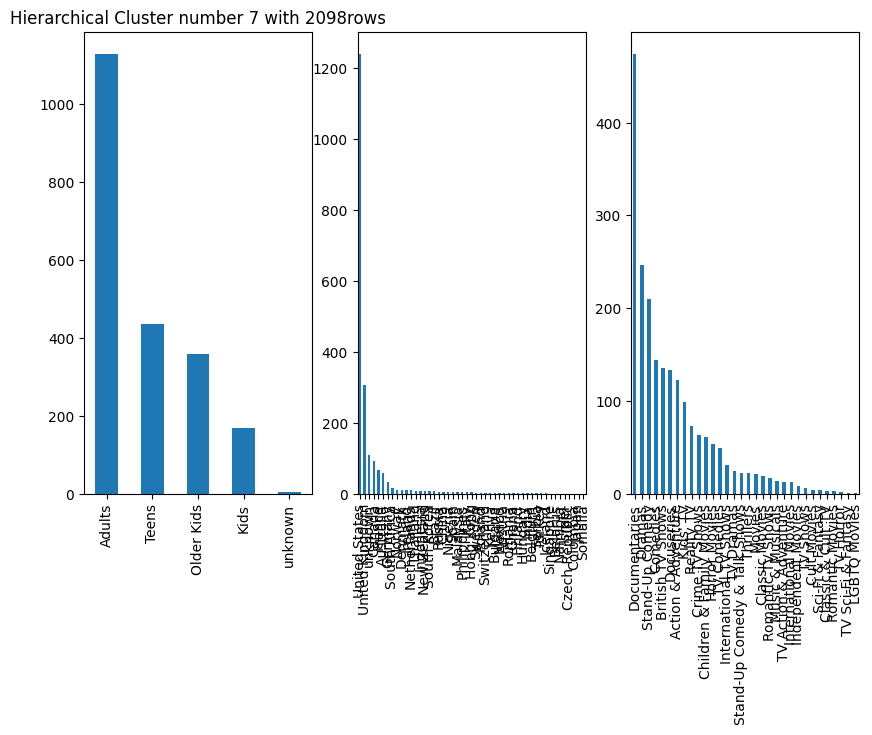

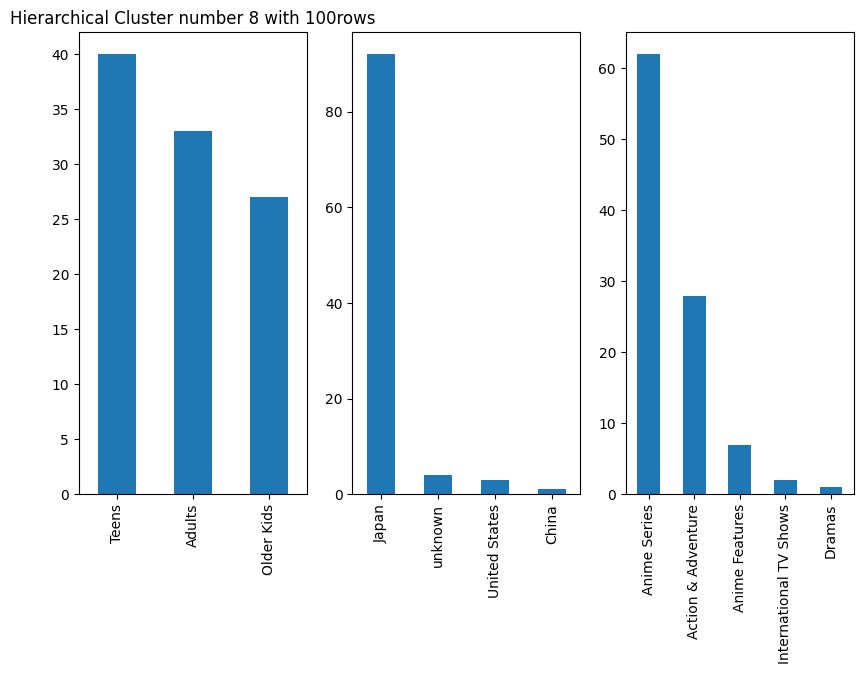

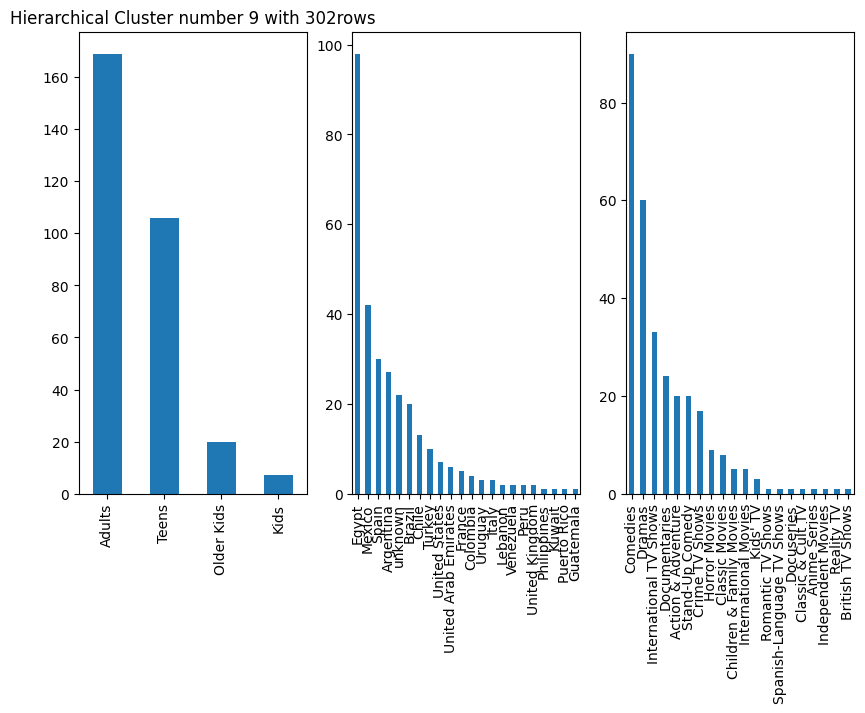

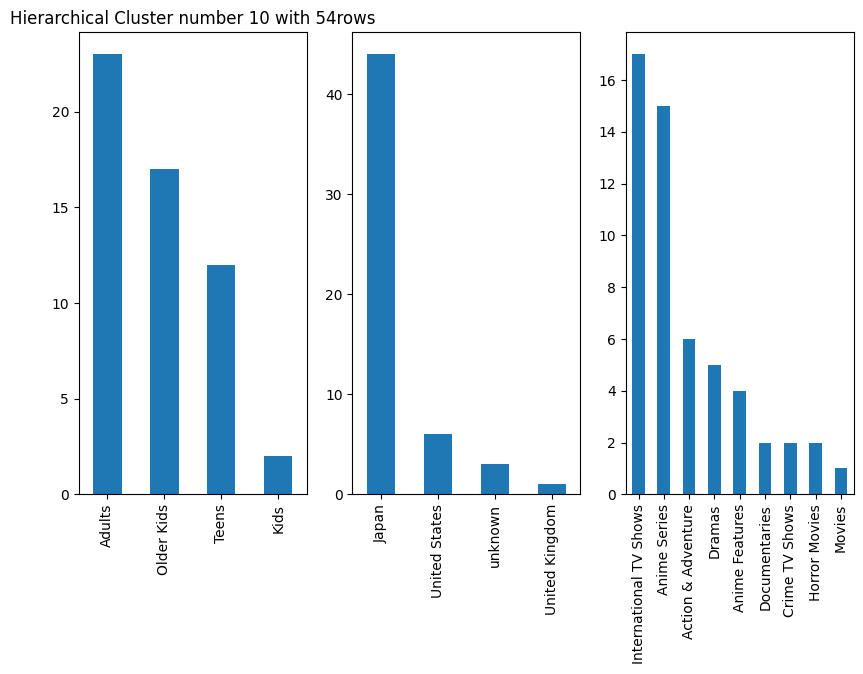

In [102]:
# viewing the rating, genre and country for each cluster
for cn in range(hc.n_clusters_):
  cluster_label='Hierarchical Cluster number'+' '+str(cn)+' '+'with'+' '+str(len(dataset[dataset['hierarchical_cluster']==cn]))+'rows'  
  plt.subplot(1,3,1)
  dataset[dataset['hierarchical_cluster']==cn]['rating'].value_counts().plot(kind='bar')
  plt.title(cluster_label)
  plt.subplot(1,3,2)
  dataset[dataset['hierarchical_cluster']==cn]['country'].value_counts().plot(kind='bar')
  plt.subplot(1,3,3)
  dataset[dataset['hierarchical_cluster']==cn]['listed_in'].value_counts().plot(kind='bar')
  plt.show()

##Which ML model did you choose from the above created models as your final prediction model and why?

The model that I am choosing as my final predicted model is **KMeans Clustering** because it has higher **silhouette score** as compared to Agglomerative Hierarchical Clustering.

###**Naming the clusters**

In [103]:
# writing a function to plot the bar chart of contents of a particular cluster given cluster_number and column as arguments
def cluster_contents(cluster_number,column):
  cluster_label='Cluster number'+' '+str(cluster_number)+' '+'with'+' '+str(len(dataset[dataset[column]==cluster_number]))+'rows'  
  plt.subplot(1,3,1)
  dataset[dataset[column]==cluster_number]['rating'].value_counts().plot(kind='bar')
  plt.title(cluster_label)
  plt.subplot(1,3,2)
  dataset[dataset[column]==cluster_number]['country'].value_counts().plot(kind='bar')
  plt.subplot(1,3,3)
  dataset[dataset[column]==cluster_number]['listed_in'].value_counts().plot(kind='bar')
  return plt.show()

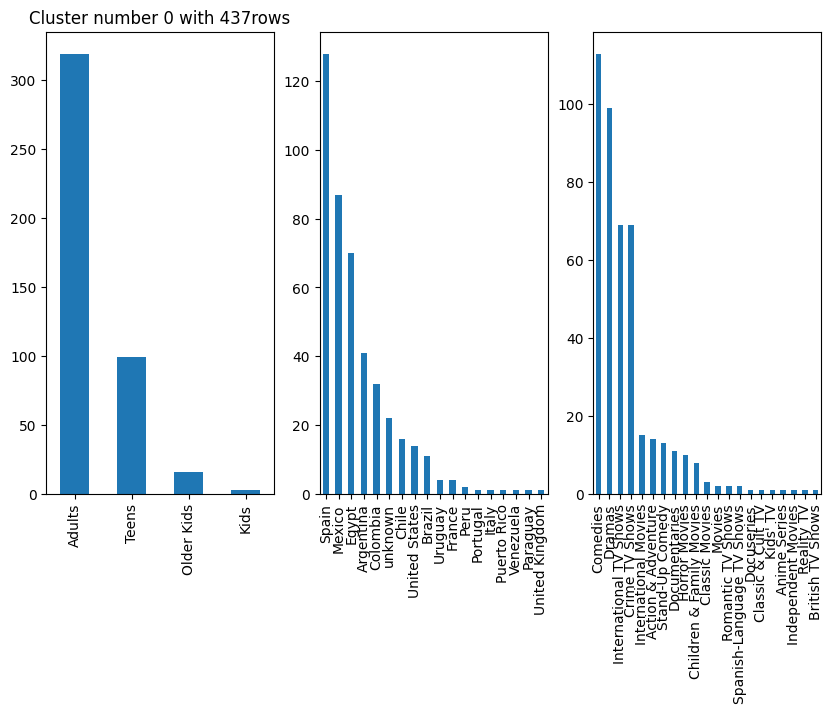

In [104]:
# viewing the contents of the 0th cluster
cluster_contents(0,'kmeans_cluster')

Since most of the content in the 0th cluster is from Spain, Mexico and Egypt and [Comedy, Drama, Crime] genre I will be naming this cluster as 
####**Spanish, Mexican and Egyptian- Comedy, Drama, Crime shows**. 

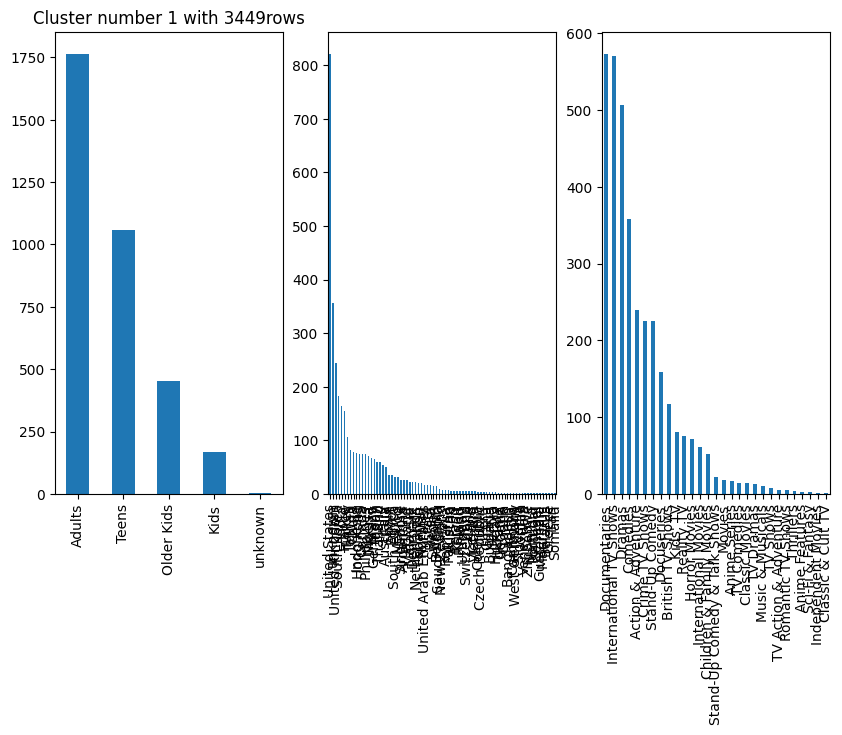

In [105]:
# viewing the contents of the 1st cluster
cluster_contents(1,'kmeans_cluster')

Since most of the content in the 1st cluster is for Adults and from foreign  countries I will be naming this cluster as 
####**International Adult Shows**. 

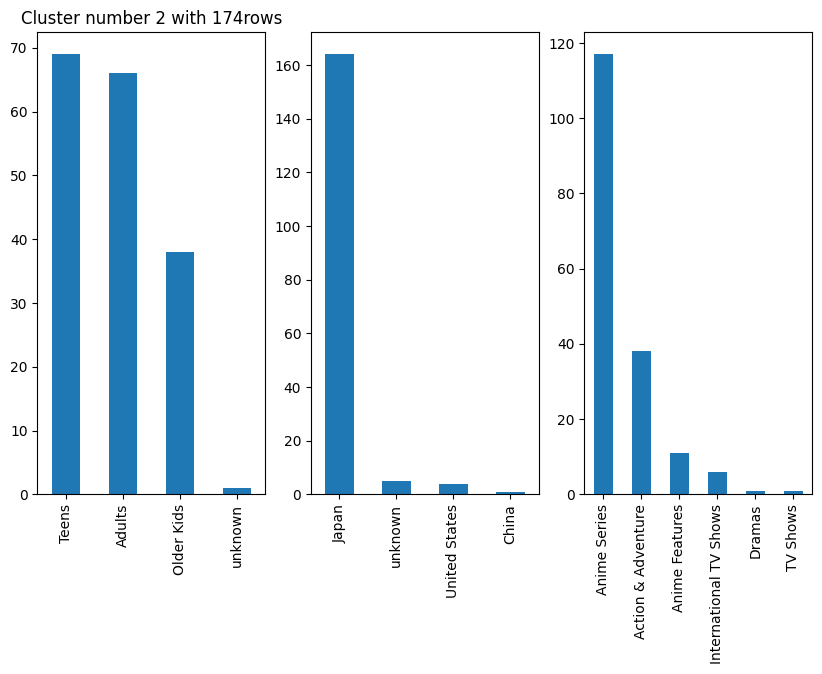

In [106]:
# viewing the contents of the 2nd cluster
cluster_contents(2,'kmeans_cluster')

Since most of the content in the 2nd cluster is from Japan and Anime and Action & Adventure genre I will be naming this cluster as 
####**Japanese Anime, Action&Adventure**. 

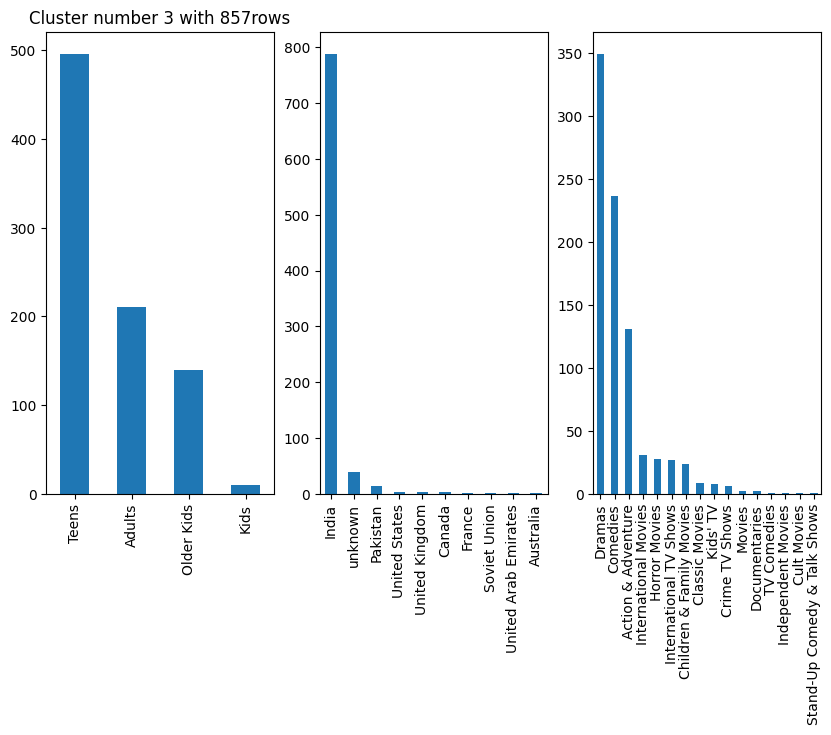

In [107]:
# viewing the contents of the 3rd cluster
cluster_contents(3,'kmeans_cluster')

Since most of the content in the 3rd cluster is from India and [Drama, Comedy, Action&Adventure] genre I will be naming this cluster as 
####**Indian Drama, Comedy, Action&Adventure Shows**. 

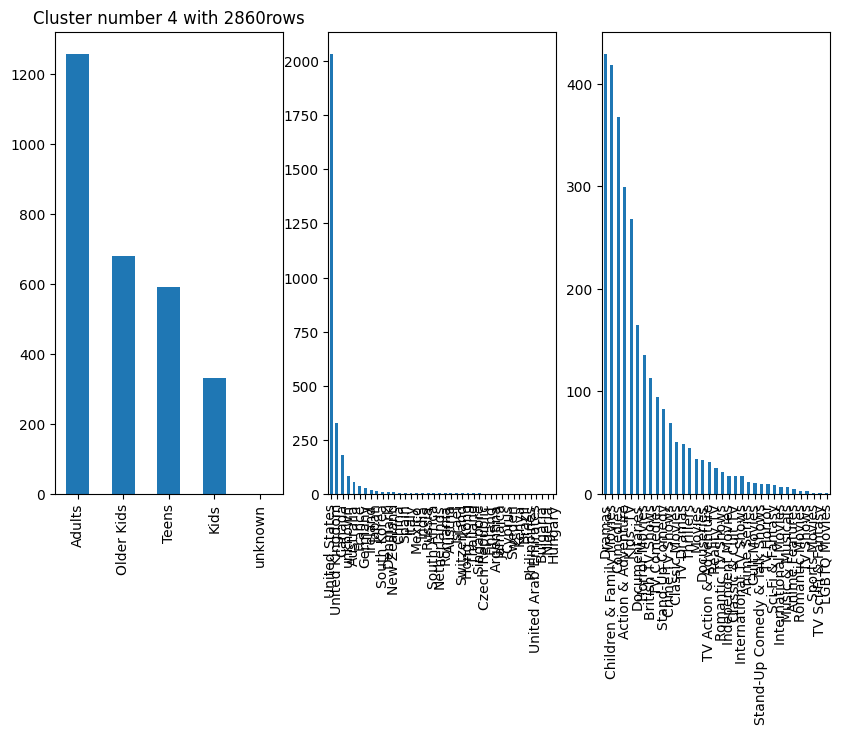

In [108]:
# viewing the contents of the 4th cluster
cluster_contents(4,'kmeans_cluster')

Since most of the content in the 4th cluster is from America and [Children and Family, Drama, Comedy] genre I will be naming this cluster as 
####**American Comedy, Drama, Children and Family Shows**. 

## Recommendation System

In [109]:
# writing a function that will return the most similar show taking show name as an argument
def recommend_show(title):
  allshows=list(clustering_df.drop(index=title)['clustering_column'])
  query=str(clustering_df.loc[title]['clustering_column'])
  vectorizer = TfidfVectorizer()
  tfidf_matrix = vectorizer.fit_transform(allshows)
  queryTFIDF = vectorizer.transform([query])
  cosine_sim = cosine_similarity(queryTFIDF, tfidf_matrix)
  most_similar_index = cosine_sim.argmax()
  similar_shows_det = allshows[most_similar_index]
  similar_show=clustering_df[clustering_df['clustering_column']==similar_shows_det].index
  print(list(similar_show))

In [110]:
# experimenting the recommender system
recommend_show('3 Idiots')

['PK']


In [111]:
# experimenting the recommender system
recommend_show('2 States')

['Jab Harry Met Sejal']


In [112]:
# experimenting the recommender system
recommend_show('ABCD: Any Body Can Dance')

['ABCD 2']


In [113]:
# experimenting the recommender system
recommend_show('Baaghi')

['A Flying Jatt']


In [114]:
# experimenting the recommender system
recommend_show('Don')

['Don 2']


In [116]:
# experimenting the recommender system
recommend_show('Dear Zindagi')

['Kapoor & Sons']


In [117]:
# experimenting the recommender system
recommend_show('Dangal')

['Secret Superstar']


# **Conclusion**

To conclude, the dataset had 7787 rows and 12 columns. Out of which 6 text columns were chosen to perform NLP on, the selected columns were genre, country, rating, director, description and cast. TFIDF vectorizer was used to vectorize the data. The data was scaled using standard scaler. Dimensionality was reduced by applying PCA and taking n components as 3.

The ML Clustering Algorithms used were Kmeans and Agglomerative Hierarchical Clustering in KMeans n clusters used were 5 and in Agglomerative Hierarchical Clustering n clusters used were 11. KMeans gave a higher silhouette score. Therefore, Kmeans was the finally chosen model. Then a Recommender system was build that suggested most similar show taking show name as an argument.   